IMPORT KODLARI

In [1]:
# Import'lar

# pip install missingno
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns
from scipy.stats import skewtest
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA




# Easier readibility
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)


DATANIN YÜKLENMESİ

In [2]:
# datanın okunması
df = pd.read_csv("/Users/esrag/Desktop/411 PROJECT/LoanDataset.csv")
df.head()

customer_id  customer_age customer_income home_ownership  employment_duration loan_intent loan_grade   loan_amnt  loan_int_rate  term_years historical_default  cred_hist_length Current_loan_status
0        1.000            22           59000           RENT              123.000    PERSONAL          C  £35,000.00         16.020          10                  Y                 3             DEFAULT
1        2.000            21            9600            OWN                5.000   EDUCATION          A   £1,000.00         11.140           1                NaN                 2          NO DEFAULT
2        3.000            25            9600       MORTGAGE                1.000     MEDICAL          B   £5,500.00         12.870           5                  N                 3             DEFAULT
3        4.000            23           65500           RENT                4.000     MEDICAL          B  £35,000.00         15.230          10                  N                 2             DEFAULT
4        5.000            24           54400           RENT                8.000     MEDICAL          B  £35,000.00         14.270          10                  Y                 4             DEFAULT

In [3]:
# ID ile işimiz yok kaldırabiliriz
df.drop("customer_id", axis=1, inplace=True)

In [4]:
# dimension
df.shape

(32586, 12)

In [5]:
# na value var mı kontrolü
df.isna().sum().sort_values(ascending=False)

historical_default     20737
loan_int_rate           3116
employment_duration      895
Current_loan_status        4
loan_amnt                  1
customer_age               0
customer_income            0
home_ownership             0
loan_intent                0
loan_grade                 0
term_years                 0
cred_hist_length           0
dtype: int64

In [6]:
# data type kontrolü
df.info()
##  customer income object->float / loan amount obj -> float para çünkü


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  object 
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   historical_default   11849 non-null  object 
 10  cred_hist_length     32586 non-null  int64  
 11  Current_loan_status  32582 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 3.0+ MB


In [7]:
# data typelarını ve yazış biçimlerini düzenle

df["customer_income"] = df["customer_income"].str.replace(r"[^\d.]", "", regex=True)
df["customer_income"] = df["customer_income"].astype("float")

df.loc[:, "loan_amnt"] = df["loan_amnt"].str.replace("£", "", regex=False)
df.loc[:, "loan_amnt"] =  df["loan_amnt"].str.replace(",", "")
df["loan_amnt"] = df["loan_amnt"].astype("float")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  float64
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32585 non-null  float64
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   historical_default   11849 non-null  object 
 10  cred_hist_length     32586 non-null  int64  
 11  Current_loan_status  32582 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 3.0+ MB


In [8]:
# duplicate veri kontrolü
df.duplicated().sum()
## 32.5k içinde 6 tane, dropla
df = df.drop_duplicates()

In [9]:
# veriler kendi içinde consistent mi kontrolü (yazılışlar)
mask = df.columns.drop(["customer_income", "loan_amnt", "loan_int_rate"])

## unique değerlerin kontrolü (yazım uyuşmazlığı var mı?) inconsistency check
for col in mask:
    uniques = pd.unique(df[col])
    print(f"\n{col} (sample-based uniques, up to 20):")
    print(uniques[:20])



customer_age (sample-based uniques, up to 20):
[ 22  21  25  23  24  26 144 123  20  32  34  29  33  28  35  31  27  30
  36  40]

home_ownership (sample-based uniques, up to 20):
['RENT' 'OWN' 'MORTGAGE' 'OTHER']

employment_duration (sample-based uniques, up to 20):
[123.   5.   1.   4.   8.   2.   6.   7.   0.   9.   3.  10.  nan  11.
  18.  12.  17.  14.  16.  13.]

loan_intent (sample-based uniques, up to 20):
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']

loan_grade (sample-based uniques, up to 20):
['C' 'A' 'B' 'D' 'E']

term_years (sample-based uniques, up to 20):
[10  1  5  4  3  6  2  9  8  7]

historical_default (sample-based uniques, up to 20):
['Y' nan 'N']

cred_hist_length (sample-based uniques, up to 20):
[ 3  2  4  8  7  6  9 10  5 11 16 15 12 13 17 14 25 28 27 22]

Current_loan_status (sample-based uniques, up to 20):
['DEFAULT' 'NO DEFAULT' nan]


In [10]:
# kategorik değşişkenlerin listelenmesi
maskdf = pd.Series(df.dtypes == object)
cat_types = maskdf[maskdf == True].index
cat_types = cat_types.tolist()
cat_types

['home_ownership',
 'loan_intent',
 'loan_grade',
 'historical_default',
 'Current_loan_status']

In [11]:
# sayısal değişkenlerin listelenmesi
num_types = df.select_dtypes(exclude="object").columns.tolist()
num_types

['customer_age',
 'customer_income',
 'employment_duration',
 'loan_amnt',
 'loan_int_rate',
 'term_years',
 'cred_hist_length']

In [12]:
# descriptive statistics of numerical variables
df[num_types].describe().T

## Finans datası için age'in min değeri çok düşük (3) ve max değeri imkansıza yakın (144)
## income'ın max değeri anlamlı mı bakılması lazım yoksa çok uç bir değer (6 milyon)
## durationda min 0 ay anlamlıysa başka sıkıntı yok gibi
## max loan amount çok yüksek (3.5 milyon) anlamlı mı kontrol
## loan int rate güzel duruyor
## term years okey
## seems okey

count      mean       std      min       25%       50%       75%         max
customer_age        32444.000    27.742     6.365    3.000    23.000    26.000    30.000     144.000
customer_income     32444.000 66075.466 61995.880 4000.000 38500.000 55000.000 79200.000 6000000.000
employment_duration 31556.000     4.790     4.145    0.000     2.000     4.000     7.000     123.000
loan_amnt           32443.000  9731.535 21111.941  500.000  5000.000  8000.000 12250.000 3500000.000
loan_int_rate       29344.000    11.016     3.241    5.420     7.900    10.990    13.470      23.220
term_years          32444.000     4.765     2.471    1.000     3.000     4.000     7.000      10.000
cred_hist_length    32444.000     5.809     4.058    2.000     3.000     4.000     8.000      30.000

İMKANSIZ DEĞERLER

In [13]:
#mantıksal olarak imkansıza yakın değerlerden direkt kurtulabiliriz

## loan dataseti 18 yaş altı kredi kullanamaz X
## 80 yaş olası değil
df.loc[(df["customer_age"] < 18) | (df["customer_age"] > 80), : ].shape[0]

11

In [14]:
## 8 tane imkansız yaş değeri, drop edilebilir
df = df.drop(df.loc[(df["customer_age"] < 18) | (df["customer_age"] > 80), : ].index)

In [15]:
## 18 yaş altı kredi kullanamaz yani credit history yaş farkı 18den küçükleri drop edebiliriz
## 775 gözlem çıkıyor datanın yaklaşık 2.6% sına tekabül ediyor drop edilebilir
mask_ind = df.loc[df["customer_age"]-df["cred_hist_length"] < 18, :].index
df = df.drop(mask_ind)

In [16]:
# müşterinin iş yerinde çalışma süresi müşteri yaşıdan fazla olamaz
# müşterinin kredi değerlendirmesinde dikkate alınan çalışma süresi, yasal yetişkinlikten sonra başlar.

# employement duration ay bazında bu yüzden 12 ile çarparak convert ediyoruz

sum(df["employment_duration"] > df["customer_age"]*12)  # sıkıntı yok

mask = df["employment_duration"] > (df["customer_age"] - 18) * 12
print(mask.sum())
# sadece 2 değer geliyor, datanın 0.007% sine tekabül ediyor drop edilebilir
df = df.drop(df.loc[mask, :].index)

1


In [17]:
df["term_years"].value_counts().sort_values(ascending=False)

term_years
3     5708
2     4297
4     4189
5     3408
7     3352
8     2828
6     2771
9     2607
1     2153
10     344
Name: count, dtype: int64

In [18]:
# müşterinin kredi geçmişi, age-18 den büyük olamaz çünkü 18 yaş altında kredi almış olamaz

mask  =  df[df.cred_hist_length > (df.customer_age - 18)].index
df = df.drop(mask)


In [19]:
df.dropna(subset=["Current_loan_status"], inplace=True)

TRAIN/TEST

In [20]:
X = df.drop("Current_loan_status", axis=1)
y = df["Current_loan_status"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [21]:
print(y.value_counts(normalize=True))
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Current_loan_status
NO DEFAULT   0.790
DEFAULT      0.210
Name: proportion, dtype: float64
Current_loan_status
NO DEFAULT   0.790
DEFAULT      0.210
Name: proportion, dtype: float64
Current_loan_status
NO DEFAULT   0.790
DEFAULT      0.210
Name: proportion, dtype: float64


Bu kontrol, train ve test setlerinde target sınıf oranlarının ana veriyle aynı kalıp kalmadığını kontrol eder.

In [22]:
X_train_raw = X_train.copy()
X_test_raw  = X_test.copy()

OUTLIER HANDLING

In [23]:
## strong right skewed finans data değerleri için yaygın outlier kontrol metodu; (1-99) percentile bakmak
low, up = X_train["loan_amnt"].quantile([0.01, 0.99])

# bariz silinmesi gereken değerler olmadıkça EDA aşamasında flag eklemek daha mantıklı
# outlier ise 1 değilse 0
X_train.loc[:, "loan_amnt_outlier"]= ((X_train.loan_amnt < low) | (X_train.loan_amnt > up)).astype(int)

X_train.head()

X_train["loan_amnt_outlier"].value_counts()


loan_amnt_outlier
0    24903
1      419
Name: count, dtype: int64

In [24]:
# income için de aynı şeyler geçerli
low_inc, up_inc = X_train["customer_income"].quantile([0.01, 0.99])
X_train.loc[:, "customer_income_outlier"] = ((X_train.customer_income < low_inc) | (X_train.customer_income > up_inc)).astype(int)
X_train.head()
X_train["customer_income_outlier"].value_counts()


customer_income_outlier
0    24836
1      486
Name: count, dtype: int64

In [25]:
# interest rate için de aynı yaklaşım izlenebilir -> continuous, hafif right skewed
low, up = X_train.loan_int_rate.quantile([0.005, 0.995])
X_train.loc[:, "loan_int_rate_outlier"] = ((X_train.loan_int_rate < low) | (X_train.loan_int_rate > up)).astype(int)

GENEL BAKIŞ

In [26]:
# düzeltmeler sonrası checking

X_train.describe().T

count      mean       std      min       25%       50%       75%         max
customer_age            25322.000    27.833     6.225   20.000    23.000    26.000    30.000      80.000
customer_income         25322.000 66223.740 53501.414 4200.000 39000.000 55200.000 79992.000 2039784.000
employment_duration     24645.000     4.808     4.060    0.000     2.000     4.000     7.000      41.000
loan_amnt               25321.000  9799.319 23666.022  500.000  5000.000  8000.000 12375.000 3500000.000
loan_int_rate           22887.000    11.011     3.248    5.420     7.900    10.990    13.470      23.220
term_years              25322.000     4.780     2.453    1.000     3.000     4.000     7.000      10.000
cred_hist_length        25322.000     5.787     4.074    2.000     3.000     4.000     8.000      30.000
loan_amnt_outlier       25322.000     0.017     0.128    0.000     0.000     0.000     0.000       1.000
customer_income_outlier 25322.000     0.019     0.137    0.000     0.000     0.000     0.000       1.000
loan_int_rate_outlier   25322.000     0.005     0.067    0.000     0.000     0.000     0.000       1.000

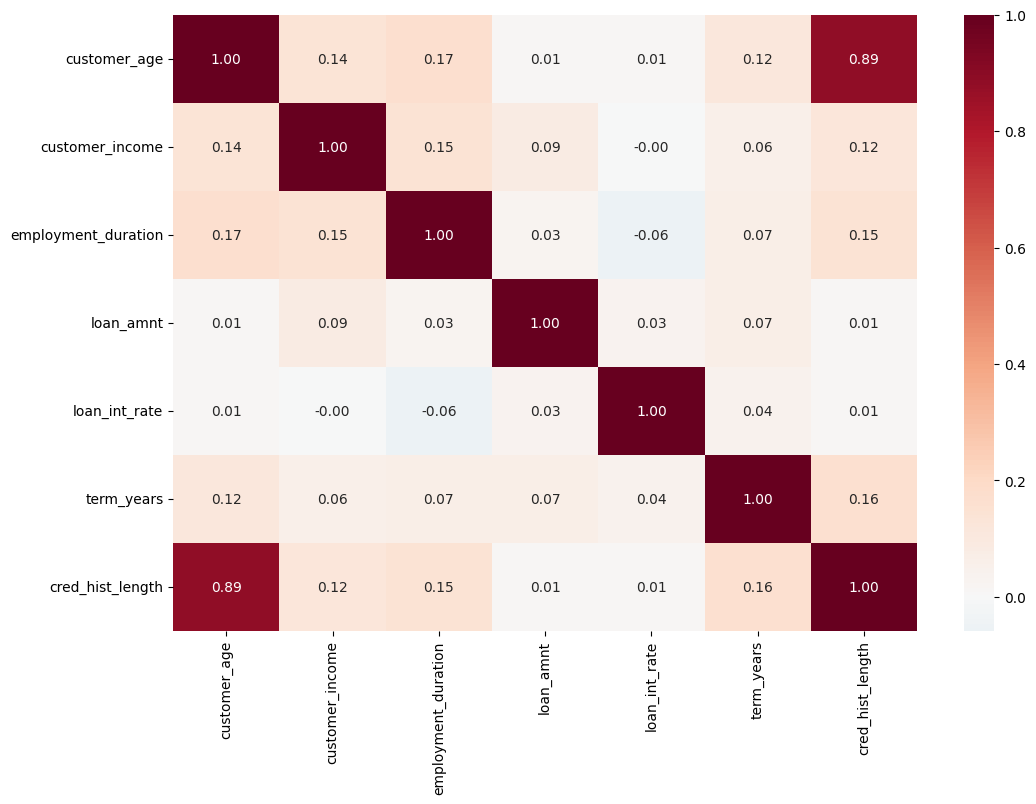

In [27]:
corr = X_train[num_types].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu_r", center=0)
plt.show()

Customer age - credit history  hariç değerler overall uncorrelated görünüyor


MISSINGNESS MECHANISM

In [28]:
y_train.isnull().sum()

np.int64(0)

In [29]:
y_test.isnull().sum()

np.int64(0)

In [30]:
missing_summary = pd.DataFrame({
    "missing_count": X_train.isnull().sum(),
    "missing_ratio": X_train.isnull().mean()
}).sort_values("missing_ratio", ascending=False)
missing_summary


missing_count  missing_ratio
historical_default               16094          0.636
loan_int_rate                     2435          0.096
employment_duration                677          0.027
loan_amnt                            1          0.000
customer_age                         0          0.000
customer_income                      0          0.000
home_ownership                       0          0.000
loan_intent                          0          0.000
loan_grade                           0          0.000
term_years                           0          0.000
cred_hist_length                     0          0.000
loan_amnt_outlier                    0          0.000
customer_income_outlier              0          0.000
loan_int_rate_outlier                0          0.000

<Figure size 300x100 with 0 Axes>

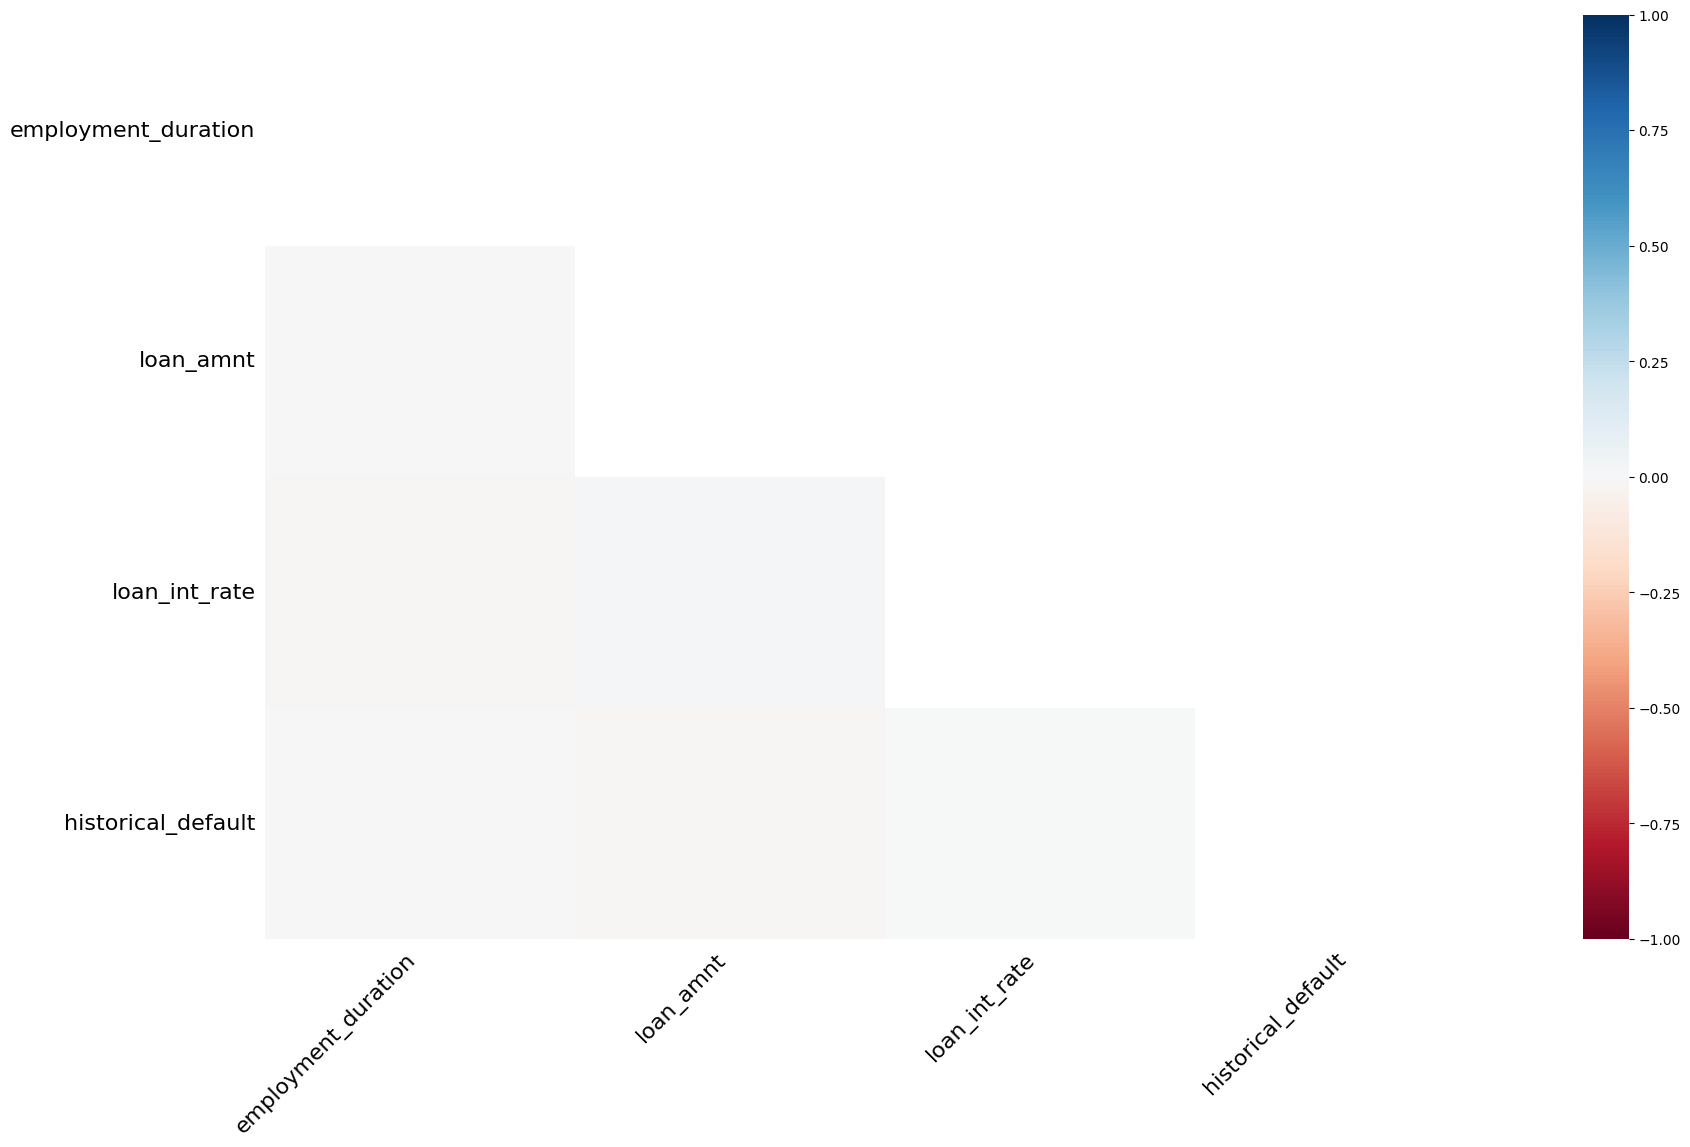

In [31]:
# Missing Values checking
plt.figure(figsize=(3, 1))
msno.heatmap(X_train)
plt.show()

eksik değerlerin birlikte oluşup oluşmadığını gösterir. - missing valuelar arasında hiçbir correlation yok gibi duruyor. Eksiklikler yapısal bir pattern göstermiyor. “Eksik değerler birlikte oluşmuyor”

<Axes: >

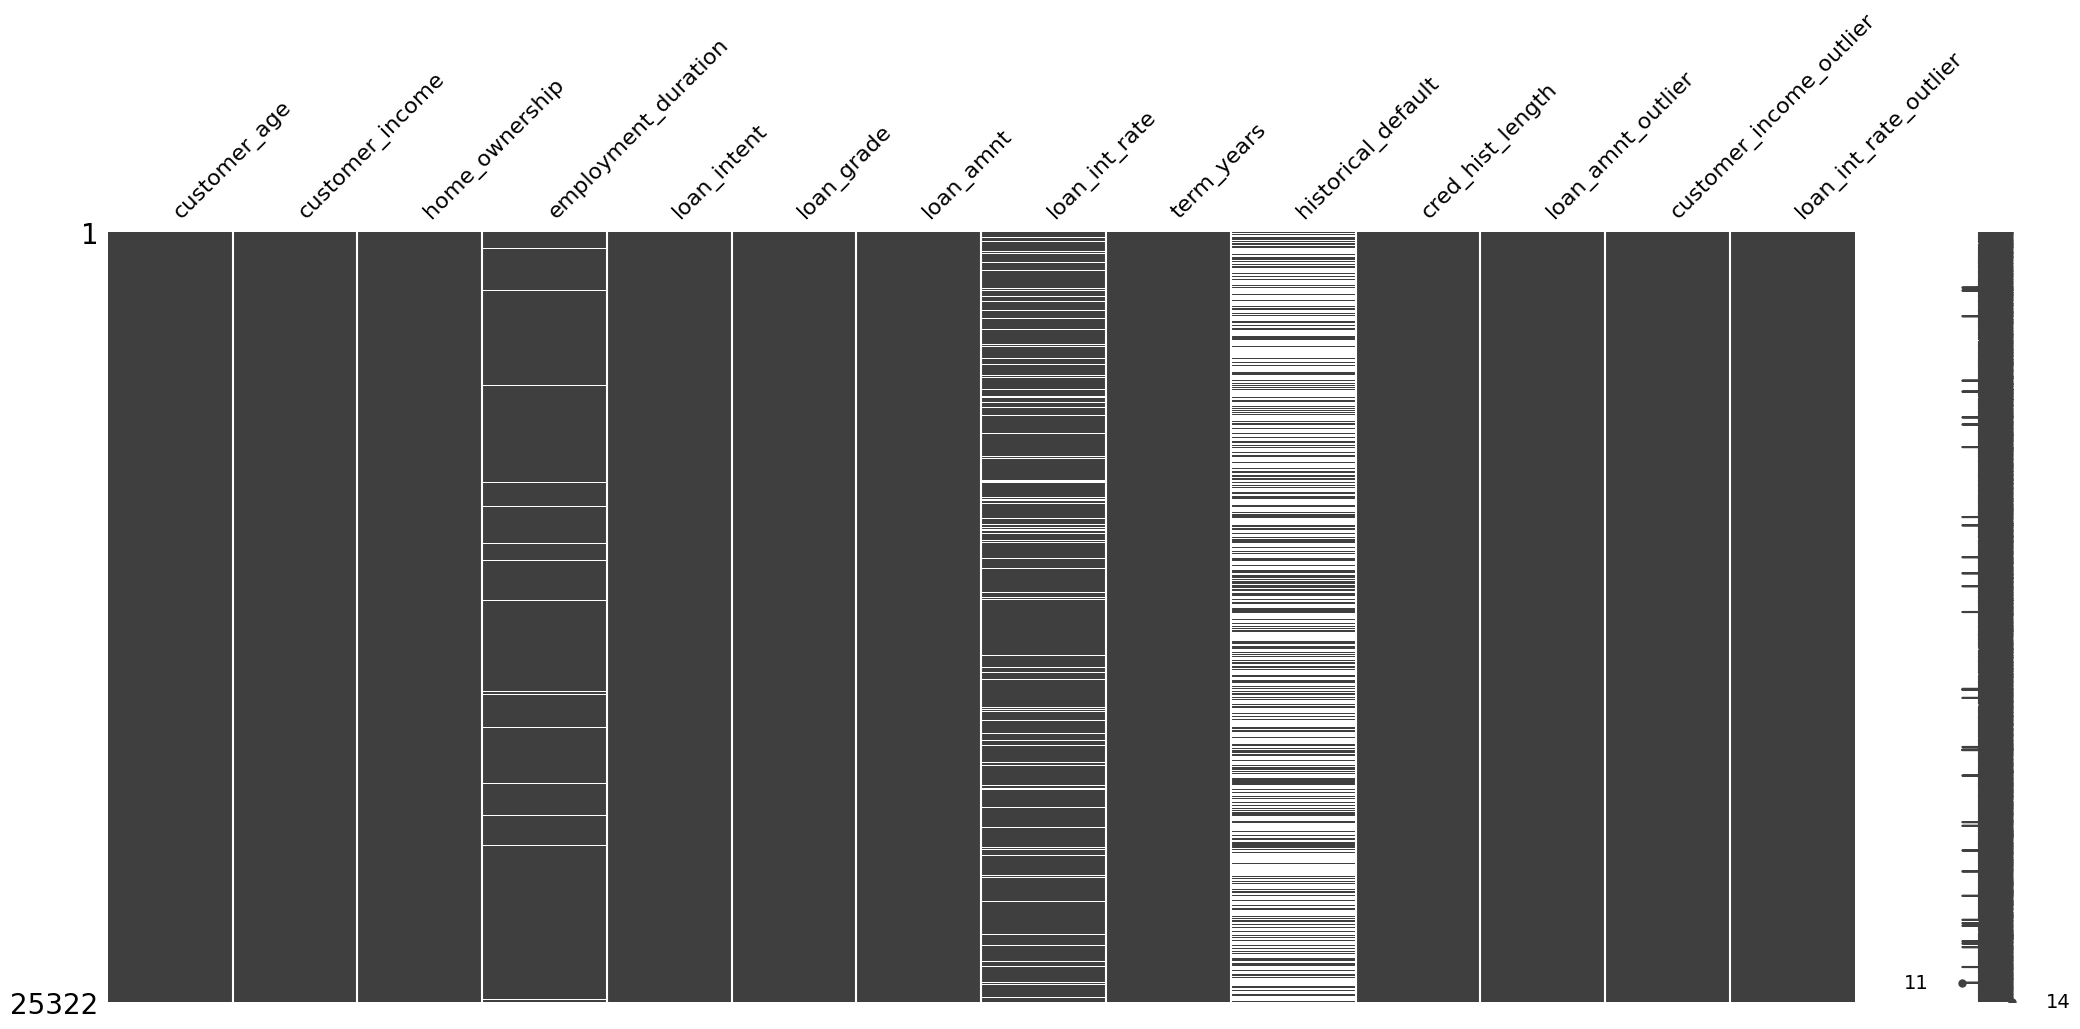

In [32]:
msno.matrix(X_train)

In [33]:
# missing valueları flagle
X_train["loan_int_rate_missing"] = X_train["loan_int_rate"].isnull().astype(int)
X_train["historical_default_missing"] = X_train["historical_default"].isnull().astype(int)
X_train["employment_duration_missing"] = X_train["employment_duration"].isnull().astype(int)
X_train.head()

customer_age  customer_income home_ownership  employment_duration      loan_intent loan_grade  loan_amnt  loan_int_rate  term_years historical_default  cred_hist_length  loan_amnt_outlier  customer_income_outlier  loan_int_rate_outlier  loan_int_rate_missing  historical_default_missing  employment_duration_missing
10864            24        64000.000       MORTGAGE                8.000        EDUCATION          A   5000.000          7.880           4                  N                 4                  0                        0                      0                      0                           0                            0
13995            23        65000.000           RENT                3.000         PERSONAL          A  14000.000         10.650           3                NaN                 4                  0                        0                      0                      0                           1                            0
10321            24        66766.000       MORTGAGE                  NaN  HOMEIMPROVEMENT          A   9000.000          6.990           4                NaN                 2                  0                        0                      0                      0                           1                            1
15729            26        91800.000           RENT                7.000          MEDICAL          B  15450.000         10.910           6                  Y                 3                  0                        0                      0                      0                           0                            0
12755            25        85000.000       MORTGAGE                7.000         PERSONAL          B   5500.000         13.490           5                NaN                 3                  0                        0                      0                      0                           1                            0

In [34]:
#  missing veriler için missingness kontrol
print(X_train.groupby("loan_int_rate_missing")["loan_amnt"].mean())

print(X_train.groupby("historical_default_missing")["customer_income"].mean())

print(X_train.groupby("employment_duration_missing")["customer_age"].mean())

loan_int_rate_missing
0   9819.956
1   9605.269
Name: loan_amnt, dtype: float64
historical_default_missing
0   59005.972
1   70362.274
Name: customer_income, dtype: float64
employment_duration_missing
0   27.845
1   27.383
Name: customer_age, dtype: float64


##### MAR - MCAR kararı için t-test

Two sample t test Formal

Eğer bir sütundaki (örn. loan_int_rate) eksiklik tamamen rastgeleyse (MCAR), bu eksikliğin olduğu satırlardaki diğer değişkenlerin (örn. income) ortalaması, eksik olmayanlarla aynı olmalıdır.

Eğer istatistiksel bir fark varsa, eksiklik rastgele değildir (MAR)

Senaryo 1 (MCAR):

loan_int_rate eksik olan kişilerin Gelir (income) ortalaması ile, eksik olmayanların Gelir ortalaması arasında fark yoksa (p > 0.05).

Anlamı: Veri rastgele kaybolmuş. Silebilirsin veya ortalama ile doldurabilirsin.

Senaryo 2 (MAR - En Olası Durum):

Test sana der ki: "loan_int_rate verisi eksik olanların loan_grade (Kredi Notu) puanları, eksik olmayanlara göre istatistiksel olarak daha düşük (p < 0.05)."

Anlamı: Faiz oranının eksik olması, kişinin kredi notuna bağlı. Bu MAR (Missing At Random) durumudur.

Aksiyon: Direkt silmek bias (yanlılık) oluşturur. Gelişmiş doldurma (KNN Imputer veya Iterative Imputer) kullanman gerekir.


* numeric variablelar için : t-test
* categoric variablelar için : chi-square test

In [35]:
def missingness_diagnostics(
    df: pd.DataFrame,
    target_col: str,
    alpha: float = 0.05,
    drop_self_missing_cols: bool = True,
    min_group_n: int = 10
) -> pd.DataFrame:
    """
    Tests whether missingness in `target_col` is associated with other observed variables.
    - Numeric vars: Welch t-test comparing distributions between missing vs non-missing groups
    - Categorical vars: Chi-square test of independence (missing indicator vs categories)

    Returns a tidy DataFrame with p-values and 'MAR suspicion' flags.
    """

    if target_col not in df.columns:
        raise ValueError(f"'{target_col}' not found in df columns.")

    miss = df[target_col].isna()
    n_miss = int(miss.sum())
    n_not = int((~miss).sum())

    print(f"\n--- Missingness analysis for '{target_col}' ---")
    print(f"Missing: {n_miss} | Non-missing: {n_not}")

    if n_miss == 0 or n_not == 0:
        print("Not enough groups to test (all missing or none missing).")
        return pd.DataFrame()

    # Identify variable types
    num_cols = df.select_dtypes(include=["number"]).columns.tolist()
    cat_cols = df.select_dtypes(exclude=["number"]).columns.tolist()

    # Optionally avoid testing other missing-indicator columns or the target itself
    if drop_self_missing_cols:
        # Drop target col itself from any list
        if target_col in num_cols:
            num_cols.remove(target_col)
        if target_col in cat_cols:
            cat_cols.remove(target_col)

        # If you created columns like *_missing, skip them to avoid trivial associations
        cat_cols = [c for c in cat_cols if not c.endswith("_missing")]
        num_cols = [c for c in num_cols if not c.endswith("_missing")]

    results = []

    # ---- Numeric tests: Welch t-test on values (dropna in each group)
    for col in num_cols:
        a = df.loc[miss, col].dropna()
        b = df.loc[~miss, col].dropna()

        # Need enough data in both groups
        if len(a) < min_group_n or len(b) < min_group_n:
            continue

        stat, p = ttest_ind(a, b, equal_var=False)
        results.append({
            "variable": col,
            "type": "numeric",
            "test": "Welch t-test",
            "p_value": float(p),
            "significant": p < alpha,
            "comment": "Associated (MAR suspicion)" if p < alpha else "No evidence (MCAR possible)"
        })

    # ---- Categorical tests: Chi-square on contingency table
    for col in cat_cols:
        # Use categories including NaN? Here we drop NaN in the categorical variable itself
        tmp = df[[col]].copy()
        tmp = tmp.loc[tmp[col].notna(), :]  # avoid undefined categories
        if tmp.empty:
            continue

        ct = pd.crosstab(miss.loc[tmp.index], tmp[col])
        # Need at least 2x2 table
        if ct.shape[0] < 2 or ct.shape[1] < 2:
            continue

        # Chi-square
        chi2, p, dof, exp = chi2_contingency(ct)
        results.append({
            "variable": col,
            "type": "categorical",
            "test": "Chi-square",
            "p_value": float(p),
            "significant": p < alpha,
            "comment": "Associated (MAR suspicion)" if p < alpha else "No evidence (MCAR possible)"
        })

    out = pd.DataFrame(results).sort_values(["significant", "p_value"], ascending=[False, True])

    if out.empty:
        print("No valid tests were run (insufficient group sizes or variable types).")
        return out

    # Pretty print (optional)
    display_cols = ["variable", "type", "test", "p_value", "comment"]
    print("\nTop results:")
    print(out[display_cols].head(20).to_string(index=False))

    return out


In [36]:
missing_cols = X_train.columns[X_train.isnull().any()].tolist()

for col in missing_cols:
    missingness_diagnostics(X_train, col)



--- Missingness analysis for 'employment_duration' ---
Missing: 677 | Non-missing: 24645

Top results:
               variable        type         test  p_value                     comment
        customer_income     numeric Welch t-test    0.000  Associated (MAR suspicion)
              loan_amnt     numeric Welch t-test    0.000  Associated (MAR suspicion)
         home_ownership categorical   Chi-square    0.000  Associated (MAR suspicion)
  loan_int_rate_outlier     numeric Welch t-test    0.000  Associated (MAR suspicion)
          loan_int_rate     numeric Welch t-test    0.000  Associated (MAR suspicion)
customer_income_outlier     numeric Welch t-test    0.000  Associated (MAR suspicion)
             loan_grade categorical   Chi-square    0.000  Associated (MAR suspicion)
     historical_default categorical   Chi-square    0.000  Associated (MAR suspicion)
             term_years     numeric Welch t-test    0.000  Associated (MAR suspicion)
      loan_amnt_outlier     numeric 

* employment_duration büyük çoğunlukla MAR, gelişmiş implementation
* loan_amnt sadece 1 missing, drop
* loan_int_rate MCAR, simple imputation
* historical_default hem MAR, hem categoric hem de missing sayısı aşırı fazla, Unknown/No info ile değiştirmek daha mantıklı. missing bilgi taşıyor

SKEWNESS KONTROLÜ

In [37]:
for i in num_types:
    print(i, X_train[i].skew())

customer_age 1.8915197094322365
customer_income 10.201945022340398
employment_duration 1.2531789798892783
loan_amnt 129.60543026643816
loan_int_rate 0.22045958653036568
term_years 0.29504584415337737
cred_hist_length 1.6692287311770293


* customer_income heavly right skewed -> log trans
* loan_amnt heavly right skewed -> log trans

In [38]:
mask_train = X_train["loan_amnt"].notna()

X_train = X_train.loc[mask_train]
y_train = y_train.loc[mask_train]


In [39]:
mask_test = X_test["loan_amnt"].notna()

X_test = X_test.loc[mask_test]
y_test = y_test.loc[mask_test]


IMPUTATION

In [40]:
X_train.loc[:, "historical_default"] = (
    X_train["historical_default"]
    .fillna("Unknown")
    .astype(str)
)


In [41]:
X_test.loc[:, "historical_default"] = (
    X_test["historical_default"]
    .fillna("Unknown")
    .astype(str)
)


In [42]:
# MCAR + skewed numeric → median imputation is statistically appropriate

loan_rate_imputer = SimpleImputer(strategy="median")


X_train.loc[:, "loan_int_rate"] = loan_rate_imputer.fit_transform(X_train[["loan_int_rate"]]).ravel()

X_test.loc[:, "loan_int_rate"]  = loan_rate_imputer.transform(X_test[["loan_int_rate"]]).ravel()


In [43]:
knn_features = ["employment_duration","customer_age","customer_income","loan_amnt","cred_hist_length"]

scaler_knn = StandardScaler()
Xtr_s = scaler_knn.fit_transform(X_train[knn_features])
Xte_s = scaler_knn.transform(X_test[knn_features])

knn_imputer = KNNImputer(n_neighbors=5, weights="distance")
Xtr_imp = knn_imputer.fit_transform(Xtr_s)
Xte_imp = knn_imputer.transform(Xte_s)

Xtr_back = scaler_knn.inverse_transform(Xtr_imp)
Xte_back = scaler_knn.inverse_transform(Xte_imp)

# sadece employment_duration kolonunu yaz
emp_idx = knn_features.index("employment_duration")
X_train.loc[:, "employment_duration"] = Xtr_back[:, emp_idx]
X_test.loc[:, "employment_duration"]  = Xte_back[:, emp_idx]


In [44]:
print(X_train["employment_duration"].isna().sum())
print(X_test["employment_duration"].isna().sum())

0
0


EDA FOR TRAIN

Univariate

In [45]:
X_train.describe().T

count      mean       std      min       25%       50%       75%         max
customer_age                25321.000    27.833     6.225   20.000    23.000    26.000    30.000      80.000
customer_income             25321.000 66223.275 53502.419 4200.000 39000.000 55200.000 79992.000 2039784.000
employment_duration         25321.000     4.787     4.025    0.000     2.000     4.000     7.000      41.000
loan_amnt                   25321.000  9799.319 23666.022  500.000  5000.000  8000.000 12375.000 3500000.000
loan_int_rate               25321.000    11.009     3.088    5.420     8.490    10.990    13.110      23.220
term_years                  25321.000     4.780     2.453    1.000     3.000     4.000     7.000      10.000
cred_hist_length            25321.000     5.787     4.074    2.000     3.000     4.000     8.000      30.000
loan_amnt_outlier           25321.000     0.017     0.128    0.000     0.000     0.000     0.000       1.000
customer_income_outlier     25321.000     0.019     0.137    0.000     0.000     0.000     0.000       1.000
loan_int_rate_outlier       25321.000     0.005     0.067    0.000     0.000     0.000     0.000       1.000
loan_int_rate_missing       25321.000     0.096     0.295    0.000     0.000     0.000     0.000       1.000
historical_default_missing  25321.000     0.636     0.481    0.000     0.000     1.000     1.000       1.000
employment_duration_missing 25321.000     0.027     0.161    0.000     0.000     0.000     0.000       1.000

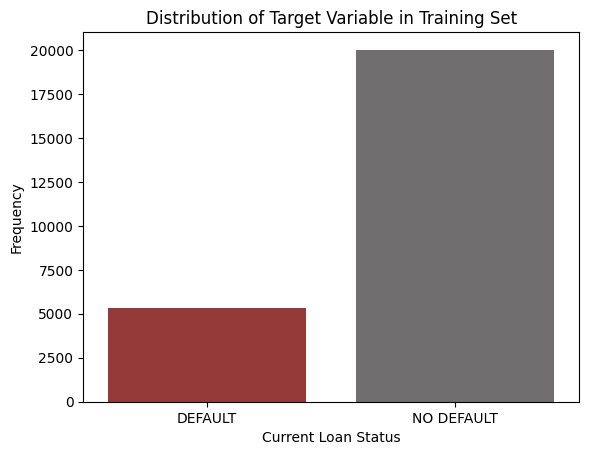

In [46]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}
y_train.value_counts(normalize=True)
sns.countplot(x=y_train, palette=colors, hue = y_train)
plt.title("Distribution of Target Variable in Training Set")
plt.xlabel("Current Loan Status")
plt.ylabel("Frequency")
plt.show()

Dataset moderately imbalanced with ~21% default rate.

Text(0, 0.5, 'Frequency')

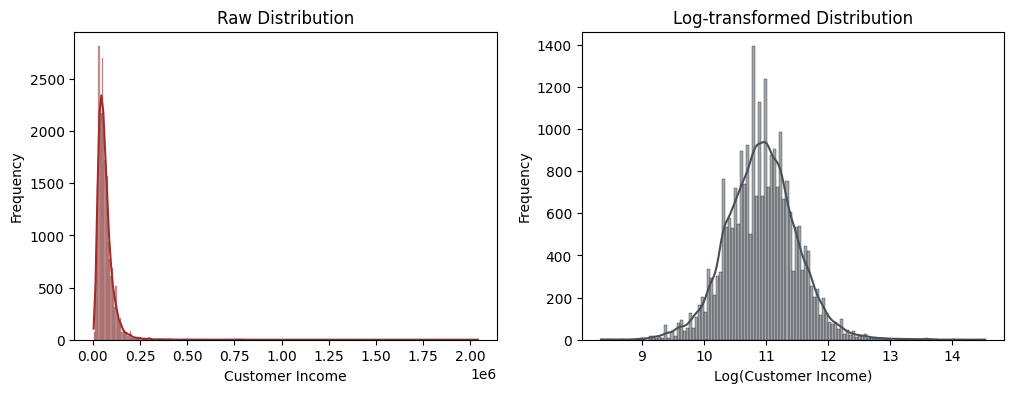

In [89]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(X_train["customer_income"], kde=True, ax=axes[0], color="brown")
axes[0].set_title("Raw Distribution")
axes[0].set_xlabel("Customer Income")
axes[0].set_ylabel("Frequency")

sns.histplot(np.log1p(X_train["customer_income"]), kde=True, ax=axes[1], color="#495057")
axes[1].set_title("Log-transformed Distribution")
axes[1].set_xlabel("Log(Customer Income)")
axes[1].set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

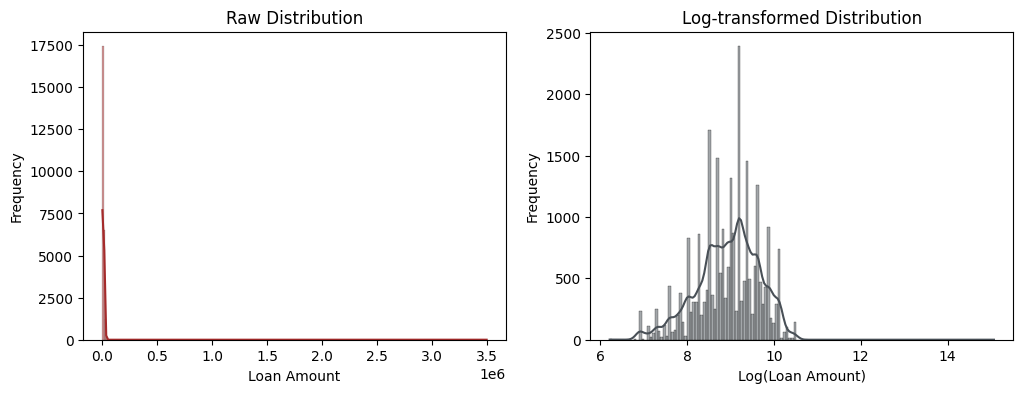

In [90]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(X_train["loan_amnt"], kde=True, ax=axes[0], color="brown")
axes[0].set_title("Raw Distribution")
axes[0].set_xlabel("Loan Amount")
axes[0].set_ylabel("Frequency")

sns.histplot(np.log1p(X_train["loan_amnt"]), kde=True, ax=axes[1], color="#495057")
axes[1].set_title("Log-transformed Distribution")
axes[1].set_xlabel("Log(Loan Amount)")
axes[1].set_ylabel("Frequency")

Raw distributions are right-skewed; log-transformation improves symmetry.

In [ ]:
X_train.describe().T

count      mean       std      min       25%       50%       75%         max
customer_age        25321.000    27.833     6.225   20.000    23.000    26.000    30.000      80.000
customer_income     25321.000 66223.275 53502.419 4200.000 39000.000 55200.000 79992.000 2039784.000
employment_duration 25321.000     4.787     4.025    0.000     2.000     4.000     7.000      41.000
loan_amnt           25321.000  9799.319 23666.022  500.000  5000.000  8000.000 12375.000 3500000.000
loan_int_rate       25321.000    11.009     3.088    5.420     8.490    10.990    13.110      23.220
term_years          25321.000     4.780     2.453    1.000     3.000     4.000     7.000      10.000
cred_hist_length    25321.000     5.787     4.074    2.000     3.000     4.000     8.000      30.000

Text(0, 0.5, 'Home Ownership Category')

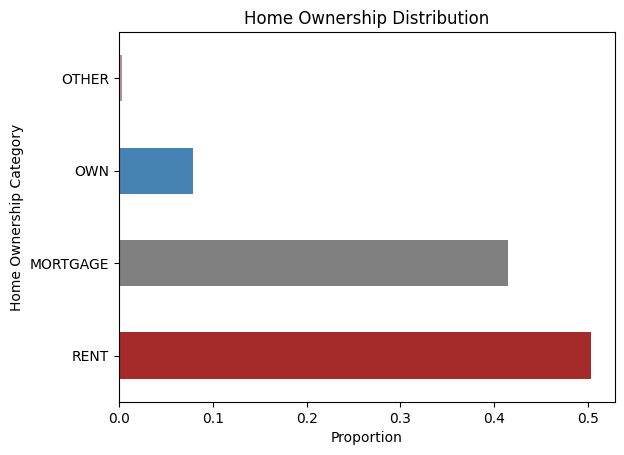

In [49]:
colors = [ "brown","grey","steelblue",  "rosybrown"]
X_train["home_ownership"].value_counts(normalize=True).plot(kind="barh", color=colors)
plt.title("Home Ownership Distribution")
plt.xlabel("Proportion")
plt.ylabel("Home Ownership Category")


Text(0, 0.5, 'Historical Default Category')

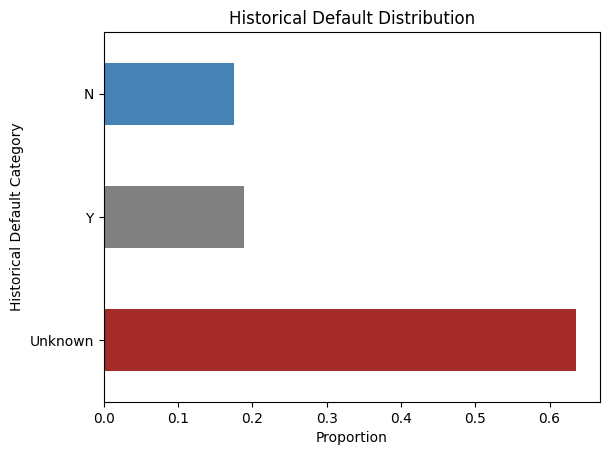

In [50]:
colors = [ "brown","grey","steelblue"]
X_train["historical_default"].value_counts(normalize=True)
X_train["historical_default"].value_counts(normalize=True).plot(kind="barh", color=colors)
plt.title("Historical Default Distribution")
plt.xlabel("Proportion")
plt.ylabel("Historical Default Category")

A substantial proportion of observations fall under the “Unknown” category, justifying its treatment as a separate informational group.

Bivariate

<Axes: >

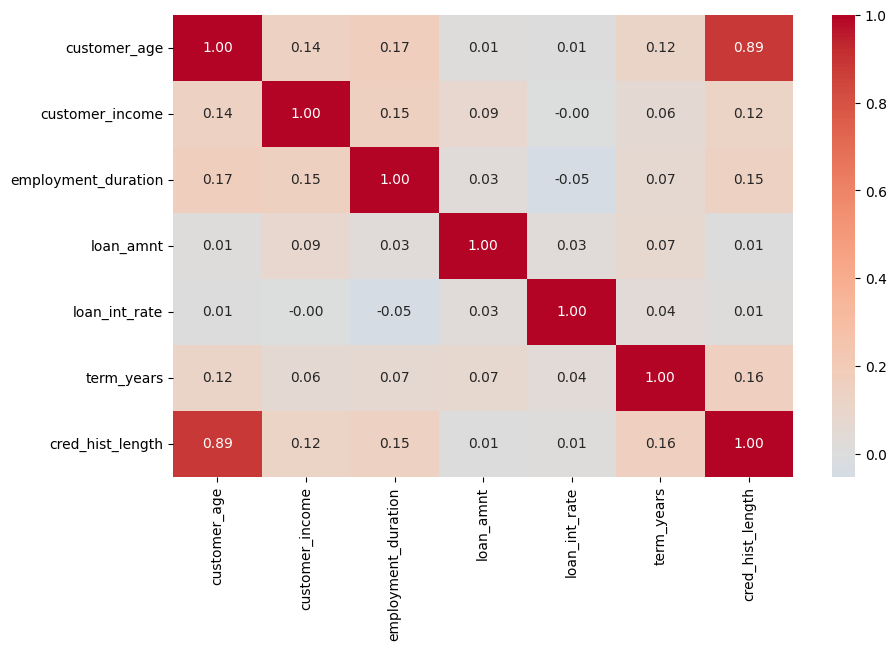

In [112]:
num_cols = X_train.select_dtypes(include=["number"]).columns.tolist()
corr = X_train[num_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, cmap="coolwarm", center=0, fmt=".2f", annot=True)


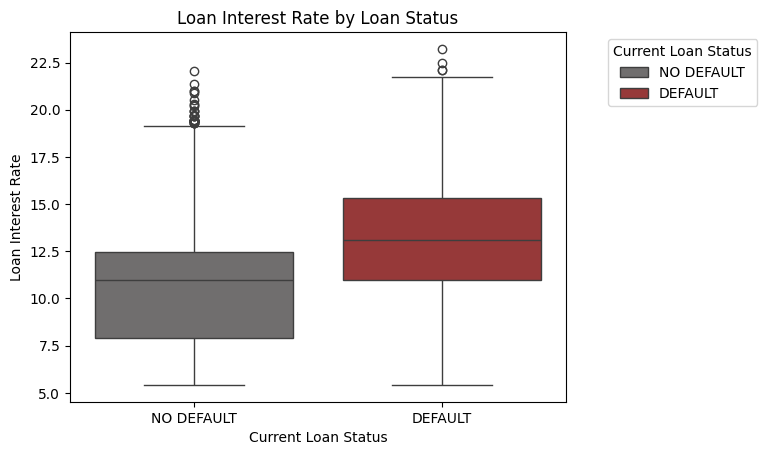

In [52]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}
sns.boxplot(x=y_train, y=X_train["loan_int_rate"], data=df, hue="Current_loan_status", palette=colors)
plt.legend(title='Current Loan Status', loc='upper right', bbox_to_anchor=(1.4, 1), frameon=True)
plt.title("Loan Interest Rate by Loan Status")
plt.xlabel("Current Loan Status")
plt.ylabel("Loan Interest Rate")
plt.show()

Faiz oranı arttıkça default riski artıyor mu? -  evet default riski faiz oranına göre artıyor gibi duruyor

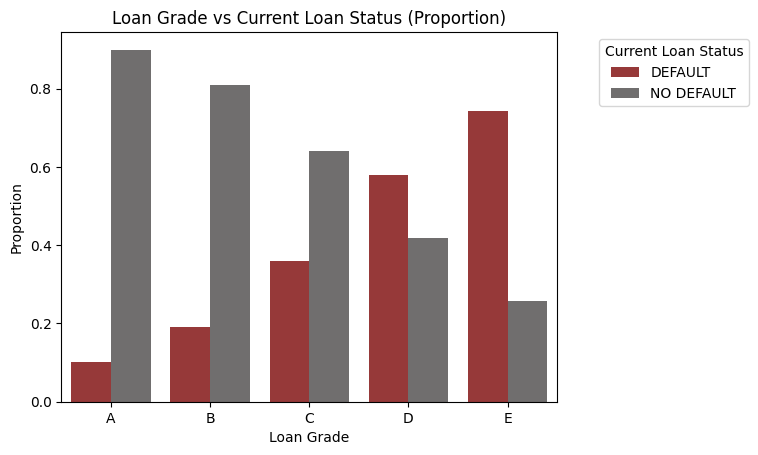

In [53]:
# daha doğru karşılaştırabilmek için normalize edip proportiona çeviriyoruz

colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}

mask = (
    pd.crosstab(X_train["loan_grade"], y_train, normalize="index")
      .reset_index()
      .melt(id_vars="loan_grade",
            var_name="Current_loan_status",
            value_name="Proportion")
)

sns.barplot(
    data=mask,
    x="loan_grade",
    y="Proportion",
    hue="Current_loan_status",
    palette=colors
)

plt.title("Loan Grade vs Current Loan Status (Proportion)")
plt.xlabel("Loan Grade")
plt.ylabel("Proportion")
plt.legend(title='Current Loan Status', loc='upper right', bbox_to_anchor=(1.4, 1), frameon=True)
plt.show()


Kredi notu kötüleştikçe default oranı artıyor mu? - Gradeler arasında özellikle A ve B için default ve No default farkı var gibi duruyor A,B altın müşteri; yani NO DEFAULT çıkması mantıklı.

Text(0, 0.5, 'Log(Customer Income)')

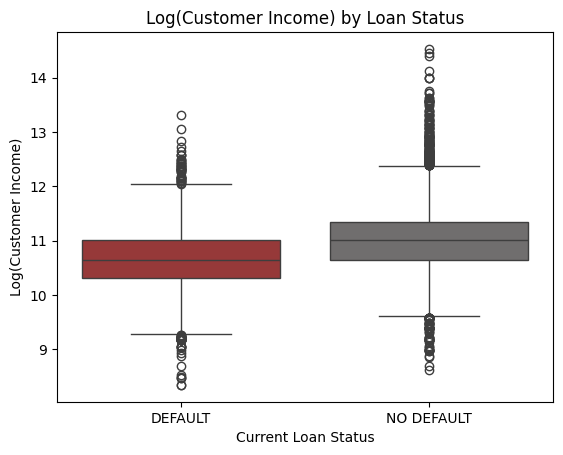

In [54]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}
sns.boxplot(
    x=y_train,
    y=np.log1p(X_train["customer_income"]),
    palette=colors,
    hue=y_train
)

plt.title("Log(Customer Income) by Loan Status")
plt.xlabel("Current Loan Status")
plt.ylabel("Log(Customer Income)")


Defaulted customers exhibit lower median income levels, with clearer separation observed after log-transformation.

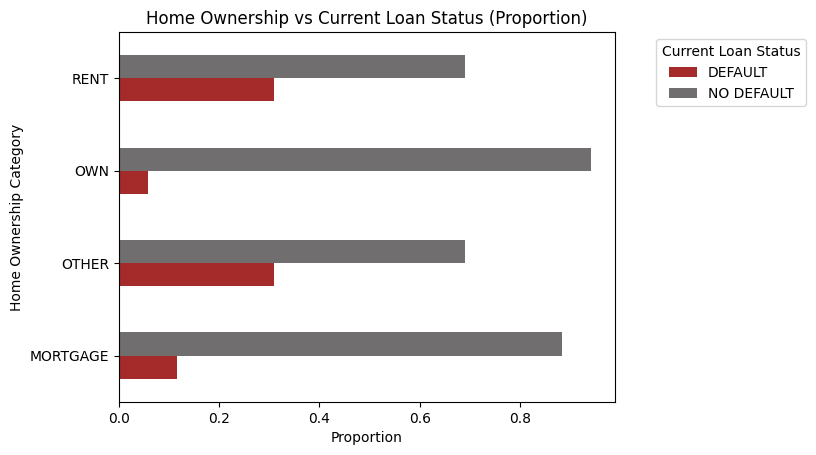

In [55]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}

pd.crosstab(
    X_train["home_ownership"],
    y_train,
    normalize="index"
).plot(kind="barh", color=colors)

plt.title("Home Ownership vs Current Loan Status (Proportion)")
plt.xlabel("Proportion")
plt.ylabel("Home Ownership Category")
plt.legend(title='Current Loan Status', loc='upper right', bbox_to_anchor=(1.4, 1), frameon=True)


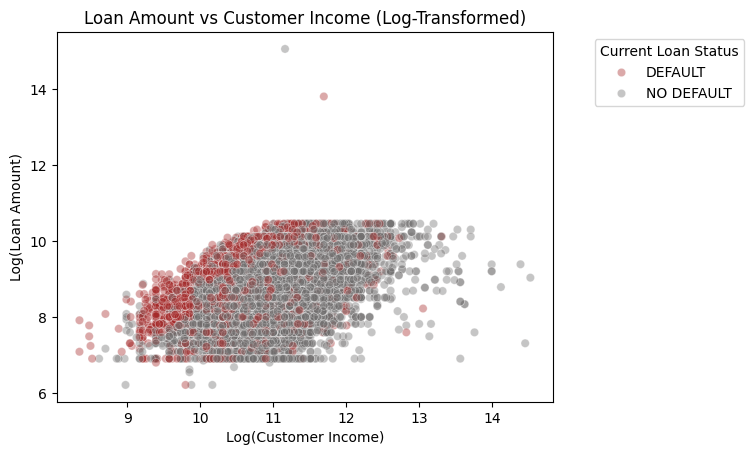

In [56]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}
sns.scatterplot(
    x=np.log1p(X_train["customer_income"]),
    y=np.log1p(X_train["loan_amnt"]),
    hue=y_train,
    alpha=0.4,
    palette=colors
)
plt.title("Loan Amount vs Customer Income (Log-Transformed)")
plt.xlabel("Log(Customer Income)")
plt.ylabel("Log(Loan Amount)")
plt.legend(title='Current Loan Status', loc='upper right', bbox_to_anchor=(1.4, 1), frameon=True)

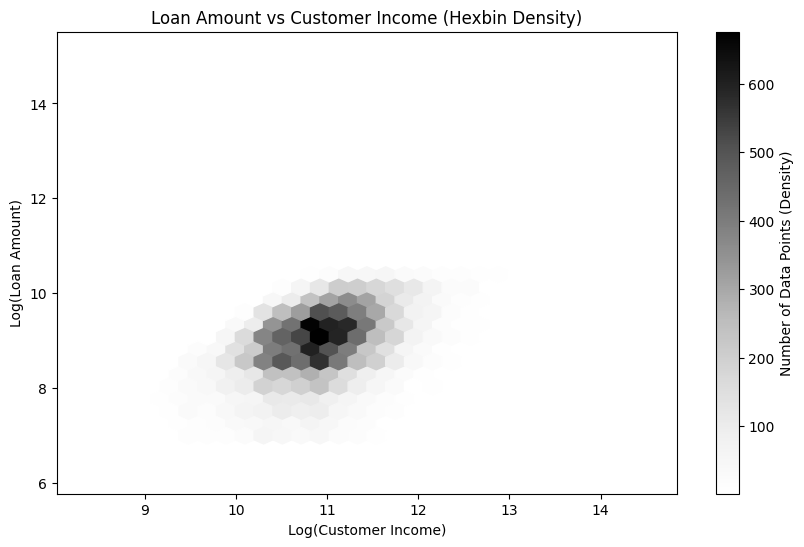

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Log dönüşümleri
log_income = np.log1p(X_train["customer_income"])
log_loan = np.log1p(X_train["loan_amnt"])

plt.figure(figsize=(10, 6))

# Cmap olarak senin renklerine yakın 'Greys' veya 'Reds' kullanabiliriz
hb = plt.hexbin(log_income, log_loan, gridsize=30, cmap='Greys', mincnt=1)

cb = plt.colorbar(hb, label='Number of Data Points (Density)')
plt.title("Loan Amount vs Customer Income (Hexbin Density)")
plt.xlabel("Log(Customer Income)")
plt.ylabel("Log(Loan Amount)")
plt.show()

Grafikteki yoğunluk dağılımı, kredi miktarı ile müşteri geliri arasında pozitif yönlü ve mantıksal olarak tutarlı bir ilişki olduğunu göstermektedir; verinin merkezindeki koyu renkli "sweet spot" bölgesi, bankanın ana portföyünün orta-üst gelir grubunda ve orta ölçekli kredi tutarlarında kümelendiğini kanıtlamaktadır. Logaritmik dönüşüm sayesinde varyansın stabilize edildiği bu görselleştirmede, altıgenlerin uç noktalarda seyrekleşmesi uç değerlerin (outliers) ana trendi bozmadığını işaret ederken, yoğunluğun doğrusal bir hat boyunca dizilmesi finansal risk iştahının gelirle paralel olarak dengeli bir şekilde arttığını  ifade etmektedir.

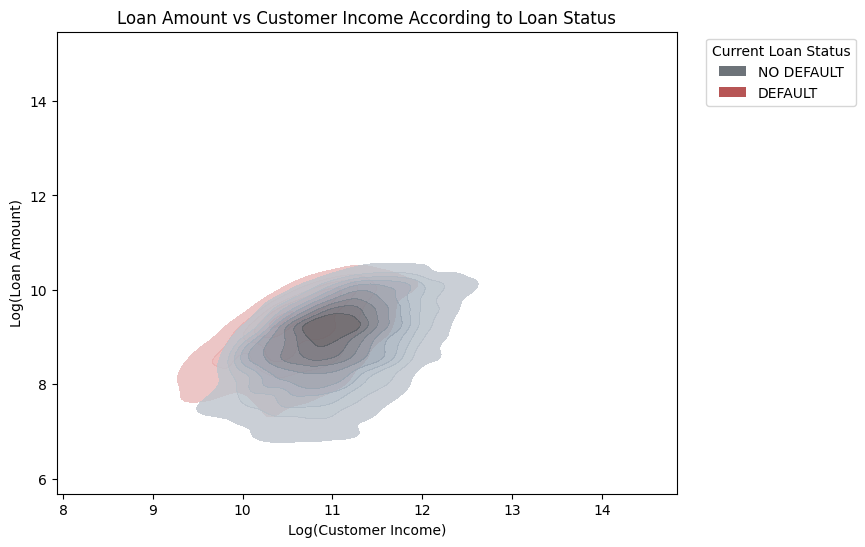

In [120]:


# Renk paletini değişken olarak tanımlayalım
colors = {"NO DEFAULT": "#495057", "DEFAULT": "brown"}

plt.figure(figsize=(8, 6))

# KDE Plot
ax = sns.kdeplot(
    x=np.log1p(X_train["customer_income"]),
    y=np.log1p(X_train["loan_amnt"]),
    hue=y_train,
    palette=colors,
    fill=True,
    alpha=0.8,
    legend=False # Otomatik legend'ı kapatıyoruz, kendimiz ekleyeceğiz
)

# --- MANUEL LEGEND ---
# Sınıflar için renk kutucukları oluşturuyoruz
legend_elements = [
    mpatches.Patch(facecolor=colors["NO DEFAULT"], label='NO DEFAULT', alpha=0.8),
    mpatches.Patch(facecolor=colors["DEFAULT"], label='DEFAULT', alpha=0.8)
]

# Legend'ı ekliyoruz
plt.legend(handles=legend_elements, 
           title='Current Loan Status', 
           loc='upper right', 
           bbox_to_anchor=(1.3, 1), 
           frameon=True)

plt.title("Loan Amount vs Customer Income According to Loan Status")
plt.xlabel("Log(Customer Income)")
plt.ylabel("Log(Loan Amount)")
plt.show()

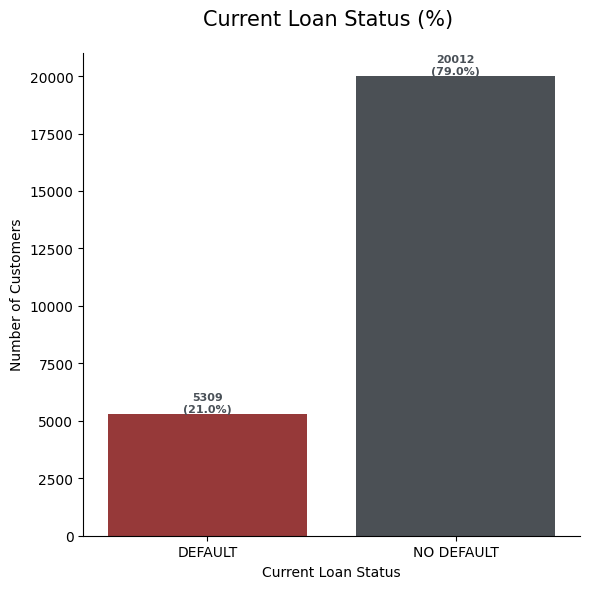

In [123]:


# Profesyonel Renk Paleti
colors = ["brown", "#495057"] 

plt.figure(figsize=(6, 6))
# Stat=percent kullanarak doğrudan yüzdeye odaklanıyoruz
ax = sns.countplot(x=y_train, palette=colors, hue=y_train, legend=False)

# Toplam veri sayısını al (yüzde hesaplamak için)
total = len(y_train)

# Her bir sütunun üzerine yüzde ve adet bilgisini ekle
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{int(y)}\n({percentage})', (x, y), 
                ha='center', va='bottom', 
                fontsize=8, fontweight='bold', color='#495057')

plt.title('Current Loan Status (%) ', fontsize=15, pad=20)
plt.ylabel('Number of Customers')
plt.xlabel('Current Loan Status')
sns.despine() # Üst ve sağ çizgileri kaldırarak temiz bir görünüm sağlar
plt.tight_layout()
plt.show()

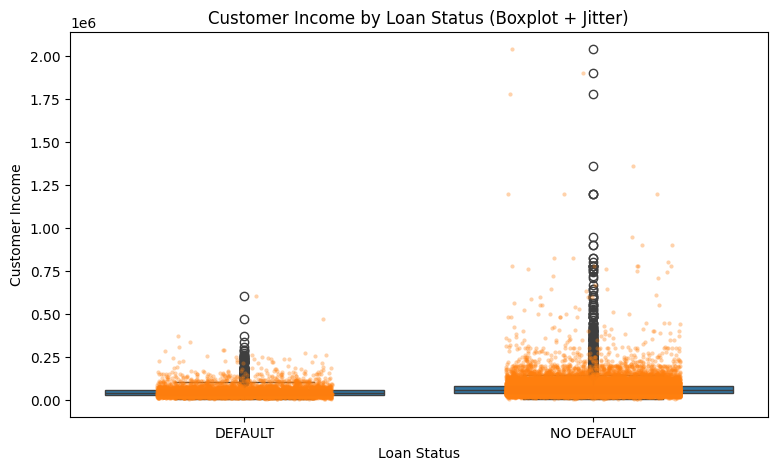

In [57]:
plt.figure(figsize=(9, 5))
sns.boxplot( x=y_train, y=X_train["customer_income"])
sns.stripplot( x=y_train, y=X_train["customer_income"],
              jitter=0.25, alpha=0.35, size=3)
plt.title("Customer Income by Loan Status (Boxplot + Jitter)")
plt.xlabel("Loan Status")
plt.ylabel("Customer Income")
plt.show()


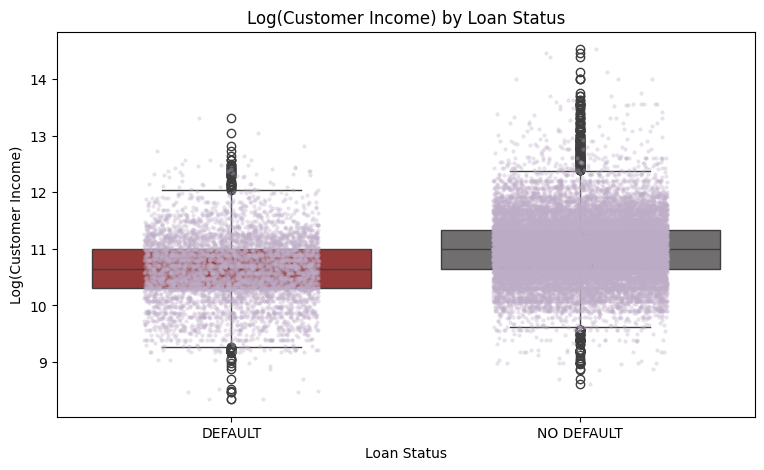

In [58]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}

plt.figure(figsize=(9, 5))
sns.boxplot(x=y_train, y=np.log1p(X_train["customer_income"]), palette=colors, hue = y_train)
sns.stripplot(x=y_train, y=np.log1p(X_train["customer_income"]),
              jitter=0.25, alpha=0.35, size=3,
              color = "#BEADC7")
plt.title("Log(Customer Income) by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Log(Customer Income)")
plt.show()


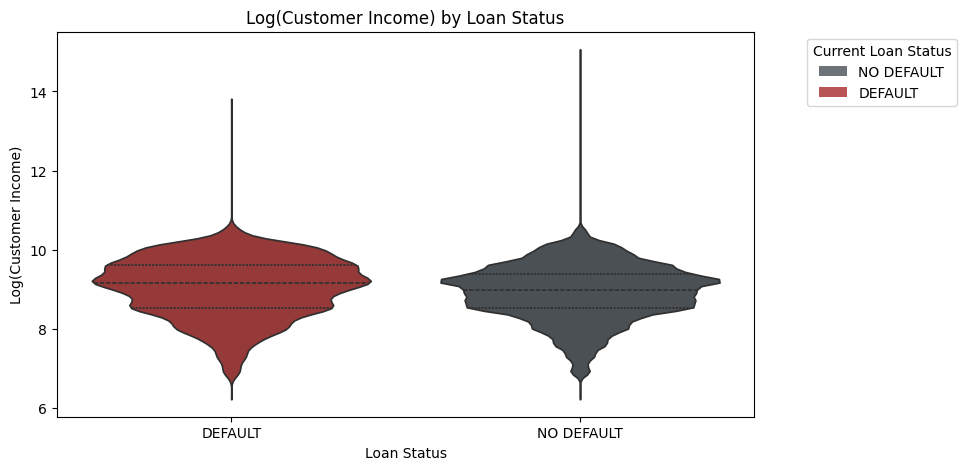

In [125]:
colors = {"NO DEFAULT": "#495057", "DEFAULT": "brown"}

plt.figure(figsize=(9, 5))
sns.violinplot(x=y_train, y=np.log1p(X_train["loan_amnt"]), inner="quartile", cut=0,palette=colors, hue = y_train)

plt.title("Log(Customer Income) by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Log(Customer Income)")
legend_elements = [
    mpatches.Patch(facecolor=colors["NO DEFAULT"], label='NO DEFAULT', alpha=0.8),
    mpatches.Patch(facecolor=colors["DEFAULT"], label='DEFAULT', alpha=0.8)
]

# Legend'ı ekliyoruz
plt.legend(handles=legend_elements, 
           title='Current Loan Status', 
           loc='upper right', 
           bbox_to_anchor=(1.3, 1), 
           frameon=True)
plt.show()


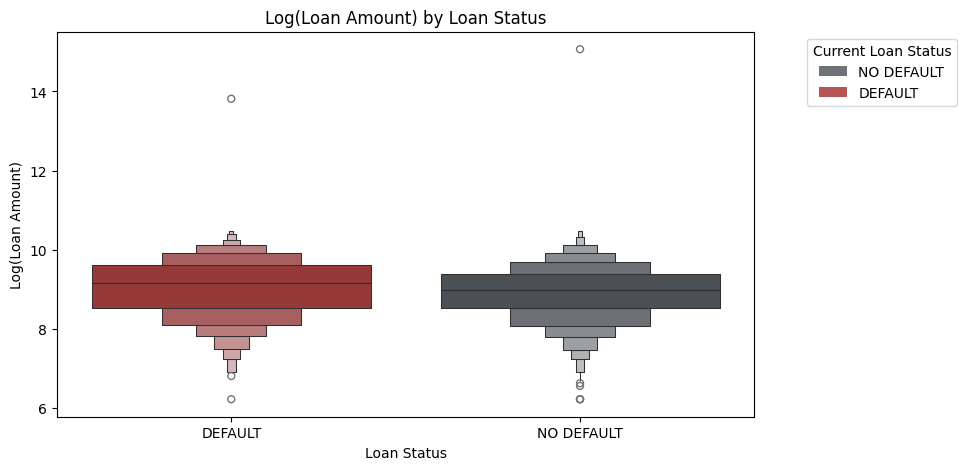

In [127]:
plt.figure(figsize=(9, 5))
colors = {"NO DEFAULT": "#495057", "DEFAULT": "brown"}

sns.boxenplot(x=y_train, y=np.log1p(X_train["loan_amnt"]),palette=colors, hue = y_train)
plt.title("Log(Loan Amount) by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Log(Loan Amount)")
legend_elements = [
    mpatches.Patch(facecolor=colors["NO DEFAULT"], label='NO DEFAULT', alpha=0.8),
    mpatches.Patch(facecolor=colors["DEFAULT"], label='DEFAULT', alpha=0.8)
]

# Legend'ı ekliyoruz
plt.legend(handles=legend_elements, 
           title='Current Loan Status', 
           loc='upper right', 
           bbox_to_anchor=(1.3, 1), 
           frameon=True)
plt.show()


Default observations cluster at lower income and higher loan amount combinations.

In [61]:
table = pd.crosstab(X_train["loan_grade"], y_train)
chi2_contingency(table)

Chi2ContingencyResult(statistic=np.float64(3533.452182707028), pvalue=np.float64(0.0), dof=4, expected_freq=array([[2555.01259824, 9630.98740176],
       [1472.91674894, 5552.08325106],
       [ 798.62489633, 3010.37510367],
       [ 432.54480471, 1630.45519529],
       [  49.90095178,  188.09904822]]))

Chi-square independence test şunu sorar:
Loan grade ile default durumu birbirinden bağımsız mı?
H₀ (Null): loan_grade ⟂ Current_loan_status
(Loan grade ile default arasında ilişki yok)
H₁ (Alternative): Bağımsız değiller
(Loan grade default ile ilişkili)




In [62]:
chi2, p, dof, exp = chi2_contingency(table)
n = table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(table.shape)-1)))
cramers_v

np.float64(0.3735589814926235)

chi-square testi sonuçları, kredi notu (loan grade) ile default durumu arasında istatistiksel olarak anlamlı ve orta–yüksek düzeyde bir ilişki olduğunu göstermektedir (χ²(4)=3543.08, p<0.001; Cramer’s V=0.37

In [63]:
table2 = pd.crosstab(X_train["home_ownership"], y_train)
chi2_contingency(table2)

Chi2ContingencyResult(statistic=np.float64(1613.5011683070297), pvalue=np.float64(0.0), dof=3, expected_freq=array([[ 2201.72224636,  8299.27775364],
       [   17.61210063,    66.38789937],
       [  418.70672564,  1578.29327436],
       [ 2670.95892737, 10068.04107263]]))

In [64]:
chi2, p, dof, exp = chi2_contingency(table2)
n = table2.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(table2.shape)-1)))
cramers_v

np.float64(0.2524318879908069)

yine orta düzeyde bir ilişki var home ownership ve default arasında

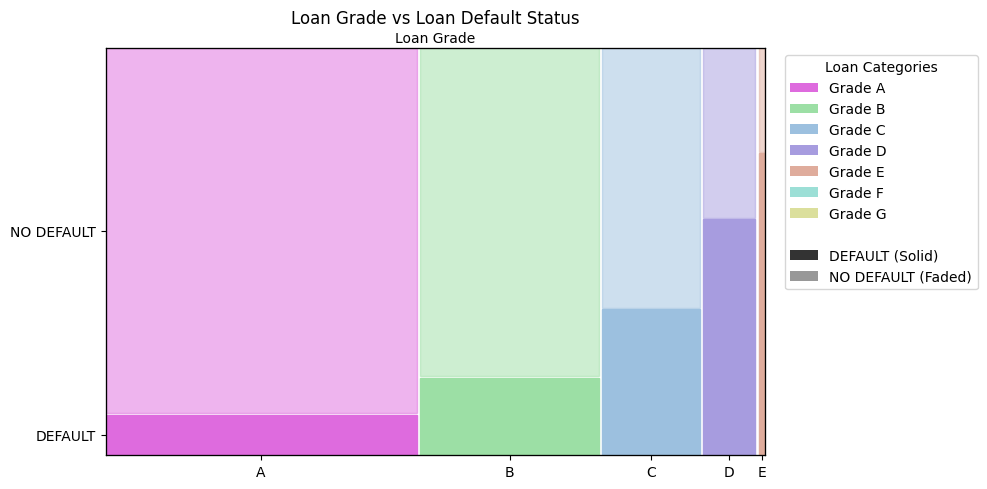

In [ ]:
color_map = {
    "A": "#DE6BDE",
    "B": "#9CDFA5",
    "C": "#9CC0DF",
    "D": "#A79CDF",
    "E": "#DFAC9C",
    "F": "#9CDFD6",
    "G": "#DBDF9C"
}
def props(key):
    status = key[1]
    grade = key[0]
    base_color = color_map.get(grade, 'gray')
    if status == 'NO DEFAULT':
        return {'color': base_color, 'alpha': 0.5}
    else:
        return {'color': base_color, 'alpha': 1.0}

data = pd.crosstab(
    X_train["loan_grade"],
    y_train
)

import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic

# Label'ları gizlemek için boş bir fonksiyon tanımlıyoruz
def no_label(key):
    return ""

fig, ax = plt.subplots(figsize=(10, 5))

# Mosaic plot çizimi - labelizer=no_label ekledik
mosaic(data.stack(), 
       title="Loan Grade vs Loan Default Status", 
       properties=props, 
       labelizer=no_label, # Kutuların üzerindeki yazıları siler
       ax=ax)


legend_elements = []

# 1. Bölüm: Grade Renkleri
for grade, color in color_map.items():
    legend_elements.append(mpatches.Patch(facecolor=color, label=f'Grade {grade}', alpha=1.0))

# 2. Bölüm: Durum Bilgisi (Saydamlık farkı açıklaması)
legend_elements.append(mpatches.Patch(color='none', label='')) # Boşluk için
legend_elements.append(mpatches.Patch(facecolor='#333333', alpha=1.0, label='DEFAULT (Solid)'))
legend_elements.append(mpatches.Patch(facecolor='#333333', alpha=0.5, label='NO DEFAULT (Faded)'))

# Legend yerleşimi
ax.legend(handles=legend_elements, 
          title='Loan Categories', 
          loc='upper left', 
          bbox_to_anchor=(1.02, 1), 
          frameon=True)

plt.xlabel("Loan Grade")
plt.ylabel("Proportion")
plt.tight_layout()
plt.show()

Mosaic plot, kredi notu kötüleştikçe temerrüt oranının sistematik olarak arttığını ve bu ilişkinin yalnızca oranlarda değil, grup büyüklükleri dikkate alındığında da güçlü olduğunu göstermektedir.


### Confirmatory Data Analysis CDA

#### loan_grade × Current_loan_status

* H₀: Loan grade ile default bağımsızdır
* H₁: Loan grade ile default bağımsız değildir


In [66]:
table = pd.crosstab(X_train["loan_grade"], y_train)

chi2, p, dof, expected = chi2_contingency(table)

n = table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))

float(chi2), float(p), dof, float(cramers_v)

(3533.452182707028, 0.0, 4, 0.3735589814926235)

Ki-kare testi sonuçları, kredi notu (loan_grade) ile temerrüt durumu (Current_loan_status) arasında istatistiksel olarak anlamlı ve orta-yüksek düzeyde bir ilişki olduğunu göstermektedir (χ²(4)=3533.45, p<0.001; Cramer’s V=0.37).

In [131]:
X_train.head()

customer_age  customer_income home_ownership  employment_duration      loan_intent loan_grade  loan_amnt  loan_int_rate  term_years historical_default  cred_hist_length
10864            24        64000.000       MORTGAGE                8.000        EDUCATION          A   5000.000          7.880           4                  N                 4
13995            23        65000.000           RENT                3.000         PERSONAL          A  14000.000         10.650           3            Unknown                 4
10321            24        66766.000       MORTGAGE                3.530  HOMEIMPROVEMENT          A   9000.000          6.990           4            Unknown                 2
15729            26        91800.000           RENT                7.000          MEDICAL          B  15450.000         10.910           6                  Y                 3
12755            25        85000.000       MORTGAGE                7.000         PERSONAL          B   5500.000         13.490           5            Unknown                 3

In [133]:
table = pd.crosstab(X_train["home_ownership"], y_train)

chi2, p, dof, expected = chi2_contingency(table)

n = table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))

float(chi2), float(p), dof, float(cramers_v)

(1613.5011683070297, 0.0, 3, 0.2524318879908069)

#### historical_default × Current_loan_status


In [67]:
table = pd.crosstab(X_train["historical_default"], y_train)
chi2, p, dof, _ = chi2_contingency(table)

float(chi2), float(p)

(14200.817313172369, 0.0)

Geçmiş temerrüt bilgisi ile mevcut temerrüt durumu arasında anlamlı bir ilişki bulunmuştur (p < 0.001). Bu sonuç, eksik geçmiş temerrüt bilgisinin (“Unknown”) ayrı bir kategori olarak ele alınmasının istatistiksel olarak anlamlı olduğunu desteklemektedir.


##### customer_income × Current_loan_status

** Önce assumptionlar:
* normality
* homojen variance

In [68]:
income_default = X_train.loc[y_train == "DEFAULT", "customer_income"]
income_nondefault = X_train.loc[y_train == "NO DEFAULT", "customer_income"]

# Normality
stat, pvaldef = shapiro(income_default.sample(500, random_state=42))
print("no default normality:",float(pvaldef))
stat, pvalnodef = shapiro(income_nondefault.sample(500, random_state=42))
print("default normality",float(pvalnodef))

# homojen variance
stat, pvalvar = levene(income_default, income_nondefault)
print("variance:", float(pvalvar))

no default normality: 3.64082004230034e-32
default normality 1.4904461301148454e-26
variance: 1.420216822338659e-29


Hepsi reject Ho. Normality ve Variance Sağlanamadı. Normality and homoscedasticity assumptions were formally tested using the Shapiro–Wilk and Levene tests, respectively. Since both assumptions were violated and the distributions exhibited significant outlier effects, the Mann–Whitney U test was preferred over the independent samples t-test.

In [128]:
income_default = X_train.loc[y_train == "DEFAULT", "customer_income"]
income_nondefault = X_train.loc[y_train == "NO DEFAULT", "customer_income"]

stat, p = mannwhitneyu(income_default, income_nondefault, alternative="two-sided")
float(stat), p

(33542796.5, np.float64(0.0))

Temerrüde düşen ve düşmeyen müşterilerin gelir dağılımları arasında istatistiksel olarak anlamlı bir fark bulunmaktadır (Mann–Whitney U, p < 0.05).

#### loan_amnt × Current_loan_status

In [70]:
income_default = X_train.loc[y_train == "DEFAULT", "loan_amnt"]
income_nondefault = X_train.loc[y_train == "NO DEFAULT", "loan_amnt"]

# Normality
stat, pvaldef = shapiro(income_default.sample(500, random_state=42))
print("no default normality:",float(pvaldef))
stat, pvalnodef = shapiro(income_nondefault.sample(500, random_state=42))
print("default normality",float(pvalnodef))

# homojen variance
stat, pvalvar = levene(income_default, income_nondefault)
print("variance:", float(pvalvar))

no default normality: 2.000491824885129e-43
default normality 3.00454202341161e-18
variance: 0.004193194162699234


assumptionlar sağlanmadı. Nonparametric test.

In [71]:
stat, p = mannwhitneyu(
    X_train.loc[y_train=="DEFAULT", "loan_amnt"],
    X_train.loc[y_train=="NO DEFAULT", "loan_amnt"]
)
stat, float(p)


(np.float64(58840985.5), 1.2274944233809705e-33)

Reject Ho. Temerrüde düşen ve düşmeyen müşterilerin loan amount değerleri arasında istatistiksel olarak anlamlı bir fark bulunmaktadır (Mann–Whitney U, p < 0.05).

Exploratory findings were formally validated through confirmatory statistical tests conducted on the training set. Chi-square tests revealed significant associations between categorical predictors and loan default status, while non-parametric tests confirmed distributional differences in key numerical variables. These results provide statistical support for the feature engineering and modeling decisions in subsequent stages.

In [72]:
X_train.head()

customer_age  customer_income home_ownership  employment_duration      loan_intent loan_grade  loan_amnt  loan_int_rate  term_years historical_default  cred_hist_length  loan_amnt_outlier  customer_income_outlier  loan_int_rate_outlier  loan_int_rate_missing  historical_default_missing  employment_duration_missing
10864            24        64000.000       MORTGAGE                8.000        EDUCATION          A   5000.000          7.880           4                  N                 4                  0                        0                      0                      0                           0                            0
13995            23        65000.000           RENT                3.000         PERSONAL          A  14000.000         10.650           3            Unknown                 4                  0                        0                      0                      0                           1                            0
10321            24        66766.000       MORTGAGE                3.530  HOMEIMPROVEMENT          A   9000.000          6.990           4            Unknown                 2                  0                        0                      0                      0                           1                            1
15729            26        91800.000           RENT                7.000          MEDICAL          B  15450.000         10.910           6                  Y                 3                  0                        0                      0                      0                           0                            0
12755            25        85000.000       MORTGAGE                7.000         PERSONAL          B   5500.000         13.490           5            Unknown                 3                  0                        0                      0                      0                           1                            0

In [45]:
# modeli etkileyebileceğin için flagler çıkarılıyor

X_train = X_train.drop(["loan_amnt_outlier", "customer_income_outlier", "loan_int_rate_outlier", "loan_int_rate_missing", "historical_default_missing", "employment_duration_missing"], axis=1)

Feature Engineering & Data Reduction

In [46]:
num_features = [
    "customer_age",
    "customer_income",
    "loan_amnt",
    "loan_int_rate",
    "employment_duration",
    "cred_hist_length"
]


In [47]:
cat_features = [
    "home_ownership",
    "loan_intent",
    "loan_grade",
    "historical_default"
]


Transformation

In [48]:
X_train_fe = X_train.copy()
X_test_fe  = X_test.copy()

In [ ]:
skewed_vars = ["customer_income", "loan_amnt"]

for col in skewed_vars:
    X_train_fe[col] = np.log1p(X_train_fe[col])
    X_test_fe[col]  = np.log1p(X_test_fe[col])

Encoding

In [50]:
nominal_cats = ["home_ownership", "loan_intent", "historical_default"]

X_train_fe = pd.get_dummies(
    X_train_fe,
    columns=nominal_cats,
    drop_first=True,
    dtype = int
)

X_test_fe = pd.get_dummies(
    X_test_fe,
    columns=nominal_cats,
    drop_first=True,
    dtype = int
)

X_test_fe = X_test_fe.reindex(columns=X_train_fe.columns, fill_value=0)


In [51]:
grade_order = {
    "A": 1,
    "B": 2,
    "C": 3,
    "D": 4,
    "E": 5
}

X_train_fe["loan_grade_ord"] = X_train_fe["loan_grade"].map(grade_order)
X_test_fe["loan_grade_ord"]  = X_test_fe["loan_grade"].map(grade_order)

# eski kategorik kolonu çıkar
X_train_fe.drop(columns="loan_grade", inplace=True)
X_test_fe.drop(columns="loan_grade", inplace=True)


Filter

In [52]:
from scipy.stats import spearmanr


results = []

for col in num_features:
    rho, p = spearmanr(X_train_fe[col], y_train.map({"NO DEFAULT": 0, "DEFAULT": 1}))
    results.append({
        "feature": col,
        "spearman_rho": rho,
        "p_value": p
    })

spearman_df = pd.DataFrame(results).sort_values(
    "spearman_rho", key=np.abs, ascending=False
)

spearman_df


feature  spearman_rho  p_value
3        loan_int_rate         0.300    0.000
1      customer_income        -0.260    0.000
4  employment_duration        -0.102    0.000
2            loan_amnt         0.076    0.000
0         customer_age        -0.033    0.000
5     cred_hist_length        -0.029    0.000

Non-parametric, monotonic, robust to outliers

* En güçlü değişkenler
* loan_int_rate (ρ = +0.30, p < 0.001)
* Faiz oranı arttıkça default olasılığı artıyor
* En güçlü tekil sayısal sinyal
* customer_income (ρ = −0.26, p < 0.001)
* Gelir arttıkça default olasılığı azalıyor
* Finansal olarak çok tutarlı
* Bu ikisi:
* CDA
* PCA loadings
* Domain bilgisi ile tam uyumlu.

* Orta–zayıf ama anlamlı sinyaller
* employment_duration (ρ = −0.10)
* Daha uzun istihdam → daha düşük risk loan_amnt (ρ = +0.076)
* Zayıf ama pozitif ilişki
*  Bunlar:
* Tek başına güçlü değil Ama çok değişkenli modelde katkı sağlayabilir
*  Çok zayıf sinyaller
* customer_age (ρ ≈ −0.03)
* cred_hist_length (ρ ≈ −0.03)
*  Yorum:
p-value küçük → örneklem çok büyük
Etki büyüklüğü ihmal edilebilir
Bu ayrımı yapman çok önemli.

In [53]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    return np.sqrt(chi2 / (n * (min(table.shape) - 1)))

cat_features = [
    "home_ownership",
    "loan_intent",
    "historical_default"
]

cv_results = []

for col in cat_features:
    cv_results.append({
        "feature": col,
        "cramers_v": cramers_v(X_train[col], y_train)
    })

cv_df = pd.DataFrame(cv_results).sort_values("cramers_v", ascending=False)
cv_df


feature  cramers_v
2  historical_default      0.749
0      home_ownership      0.252
1         loan_intent      0.143

0.1–0.3 → weak–moderate
0.3+ → strong association

In [54]:
corr = X_train_fe[num_features].corr().abs()

corr


customer_age  customer_income  loan_amnt  loan_int_rate  employment_duration  cred_hist_length
customer_age                1.000            0.112      0.033          0.008                0.169             0.886
customer_income             0.112            1.000      0.410          0.022                0.217             0.095
loan_amnt                   0.033            0.410      1.000          0.098                0.108             0.028
loan_int_rate               0.008            0.022      0.098          1.000                0.053             0.013
employment_duration         0.169            0.217      0.108          0.053                1.000             0.149
cred_hist_length            0.886            0.095      0.028          0.013                0.149             1.000

Although both variables exhibit predictive relevance, their high correlation suggests redundancy. Therefore, dimensionality reduction methods were preferred over manual feature elimination.


Although both variables exhibit predictive relevance, their high correlation suggests redundancy. Therefore, dimensionality reduction methods were preferred over manual feature elimination.


Filter-based feature selection was conducted using multiple criteria. Mutual information and univariate statistical tests were employed to assess the relevance of numerical variables with respect to the target, while Cramér’s V was used for categorical predictors. In addition, inter-feature correlations were examined to identify redundancy. Rather than aggressively removing correlated variables, dimensionality reduction techniques were preferred to preserve information content.

Kişinin yetişkin hayatının ne kadarı kredi geçmişiyle geçmiş? 
* yüksek değerler;erken yaşta krediye girmiş uzun finansal geçmiş
* düşük değerler; kredi geçmişi kısa, riskli olabilir

In [55]:
X_train_fe["credit_hist_ratio"] = X_train_fe["cred_hist_length"] / X_train_fe["customer_age"]

X_train_fe.drop(columns=["customer_age", "cred_hist_length"], inplace=True)

In [56]:
X_test_fe["credit_hist_ratio"] = X_test_fe["cred_hist_length"] / X_test_fe["customer_age"]

X_test_fe.drop(columns=["customer_age", "cred_hist_length"], inplace=True)


In [57]:
num_features = [
    "customer_income",
    "loan_amnt",
    "loan_int_rate",
    "employment_duration",
    "credit_hist_ratio"
    
]


corr = X_train_fe[num_features].corr().abs()

corr


customer_income  loan_amnt  loan_int_rate  employment_duration  credit_hist_ratio
customer_income                1.000      0.410          0.022                0.217              0.088
loan_amnt                      0.410      1.000          0.098                0.108              0.029
loan_int_rate                  0.022      0.098          1.000                0.053              0.013
employment_duration            0.217      0.108          0.053                1.000              0.139
credit_hist_ratio              0.088      0.029          0.013                0.139              1.000

PCA

Prior to dimensionality reduction, features were standardized using z-score normalization to ensure that variables measured on different scales contributed equally to the analysis.

In [136]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled  = scaler.transform(X_test_fe)


In [153]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

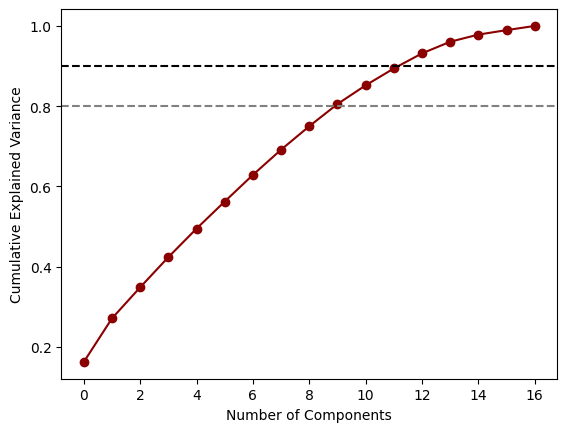

In [155]:
plt.plot(
    np.cumsum(pca.explained_variance_ratio_),
    marker="o", color="darkred"
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.axhline(0.80, linestyle="--", color="grey")
plt.axhline(0.90, linestyle="--", color="black")
plt.show()


In [157]:
np.cumsum(pca.explained_variance_ratio_)

array([0.16235893, 0.27099765, 0.34841553, 0.42358461, 0.49470224,
       0.56225885, 0.62863354, 0.69144586, 0.74993362, 0.80523865,
       0.851886  , 0.89392178, 0.93151628, 0.96056622, 0.97839252,
       0.98948632, 1.        ])

Grafikten okuduğumuz:
*  8 bileşen → %80 varyans
*  11–12 bileşen → %90 varyans
* Sonrasında kazanç çok yavaşlıyor (diminishing returns)
*  Bu tam bir “elbow / knee” davranışı.
* PCA’da “bu değişken anlamlı mı?” diye bakılmaz
* “Bu bileşen ne kadar bilgi taşıyor?” diye bakılır

%90'a göre seçersek 18den 11e azaltmış oluyoruz.

In [91]:
feature_names = X_train_fe.columns

loadings = pd.DataFrame(
    pca.components_.T,
    index=feature_names,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)


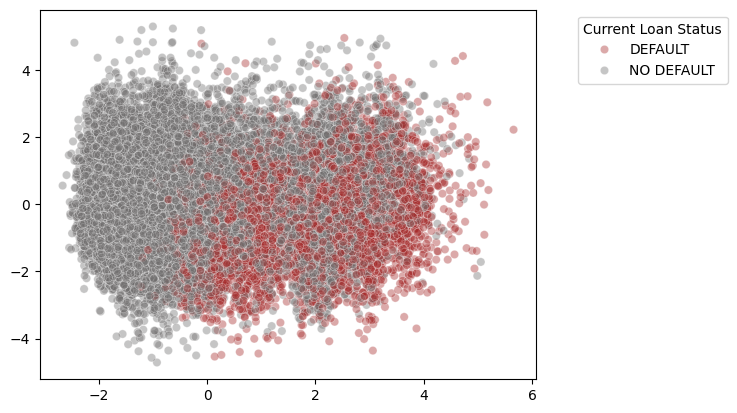

In [92]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}

sns.scatterplot(
    x=X_train_pca[:,0],
    y=X_train_pca[:,1],
    hue=y_train,
    alpha=0.4,
    palette=colors
)

plt.legend(title='Current Loan Status', loc='upper right', bbox_to_anchor=(1.4, 1), frameon=True)



PCA’nın ilk iki bileşeni kullanılarak oluşturulan dağılım grafiği, temerrüt ve temerrütsüz gözlemlerin tamamen ayrışmadığını, ancak özellikle PC1 ekseni boyunca temerrüt gözlemlerinin daha yüksek değerlere kayma eğilimi gösterdiğini ortaya koymaktadır.

Alternative PCA

%85 explained variance için gereken min component sayısı: k = 9
kümülatif explained variance: 0.8699


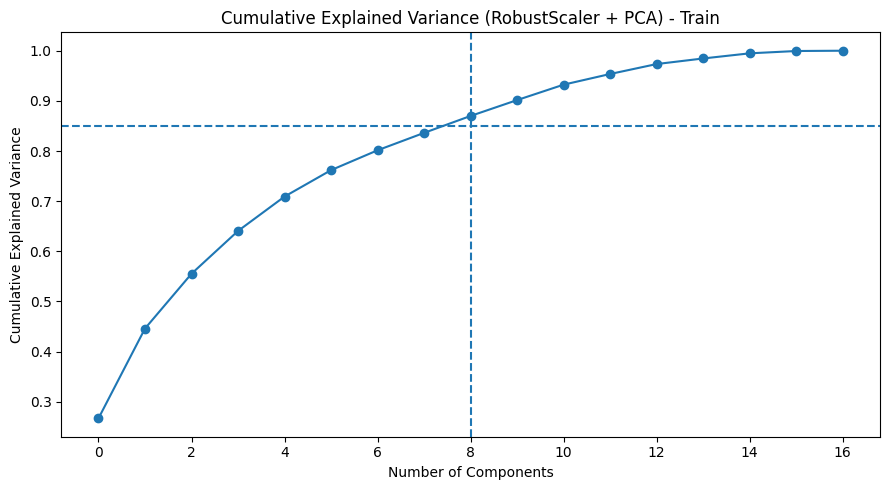

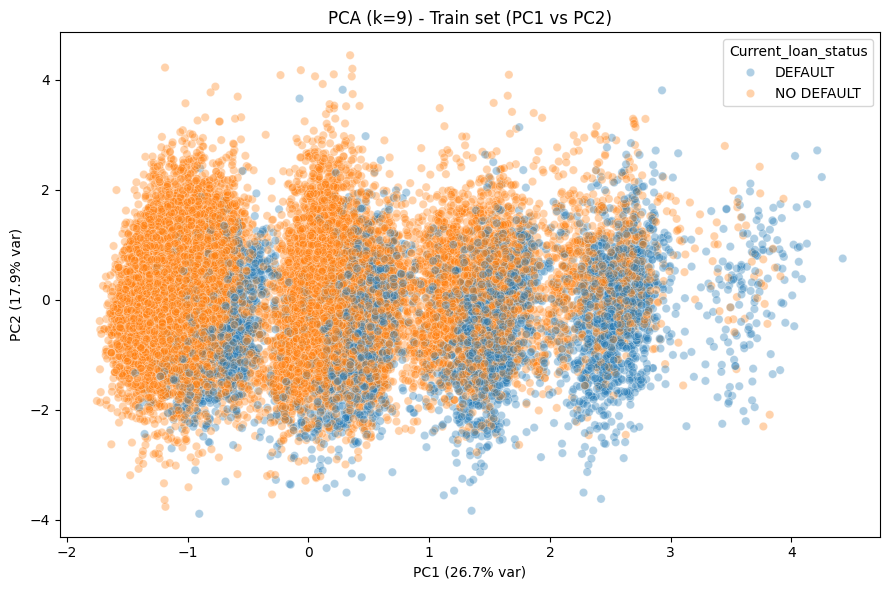


Top loadings for PC1 (abs) - Top 10:
loan_grade_ord                0.805
loan_int_rate                 0.470
historical_default_Unknown    0.238
historical_default_Y          0.177
credit_hist_ratio             0.151
loan_amnt                     0.100
term_years                    0.072
home_ownership_RENT           0.063
loan_intent_EDUCATION         0.014
loan_intent_HOMEIMPROVEMENT   0.012
Name: PC1_loading, dtype: float64

Top loadings for PC2 (abs) - Top 10:
customer_income              0.627
loan_amnt                    0.544
employment_duration          0.456
home_ownership_RENT          0.192
term_years                   0.171
credit_hist_ratio            0.160
historical_default_Unknown   0.075
loan_int_rate                0.047
historical_default_Y         0.039
loan_grade_ord               0.027
Name: PC2_loading, dtype: float64

Top loadings for PC3 (abs) - Top 10:
employment_duration     0.734
loan_amnt               0.500
credit_hist_ratio       0.375
customer_income   

In [ ]:
from sklearn.preprocessing import RobustScaler

# 1) Scale (fit train)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled  = scaler.transform(X_test_fe)

# 2) Full PCA (fit train) -> k seçmek için
pca_full = PCA(random_state=42)
pca_full.fit(X_train_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# 3) %85 için gereken minimum component sayısı
target = 0.85
k = np.argmax(cum_var >= target) + 1
print(f"%{target*100:.0f} explained variance için gereken min component sayısı: k = {k}")
print("kümülatif explained variance:", round(cum_var[k-1], 4))

# 4) Seçilen k ile PCA'yı tekrar fit et (train) ve transform et
pca_k = PCA(n_components=k, random_state=42)
X_train_pca = pca_k.fit_transform(X_train_scaled)
X_test_pca  = pca_k.transform(X_test_scaled)

# 5) Kümülatif variance grafiği + seçilen k işareti
plt.figure(figsize=(9,5))
plt.plot(cum_var, marker="o")
plt.axhline(target, linestyle="--")
plt.axvline(k-1, linestyle="--")  # index 0'dan başladığı için
plt.title("Cumulative Explained Variance (RobustScaler + PCA) - Train")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# 6) PC1-PC2 scatter (train) 
pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i}" for i in range(1, k+1)])
pca_df["Current_loan_status"] = y_train.values

plt.figure(figsize=(9,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Current_loan_status", alpha=0.35)
plt.title(f"PCA (k={k}) - Train set (PC1 vs PC2)")
plt.xlabel(f"PC1 ({pca_k.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca_k.explained_variance_ratio_[1]*100:.1f}% var)")
plt.tight_layout()
plt.show()

# 7)  loadings: sadece seçilen k için
loadings = pd.DataFrame(
    pca_k.components_.T,
    index=X_train_fe.columns,
    columns=[f"PC{i}_loading" for i in range(1, k+1)]
)

for i in range(1, min(k, 8)+1):  # çok uzamasın diye ilk 8 PC'yi yazdır
    col = f"PC{i}_loading"
    print(f"\nTop loadings for PC{i} (abs) - Top 10:")
    print(loadings[col].abs().sort_values(ascending=False).head(10))


%85 explained variance için gereken min component sayısı: k = 11
kümülatif explained variance: 0.8519


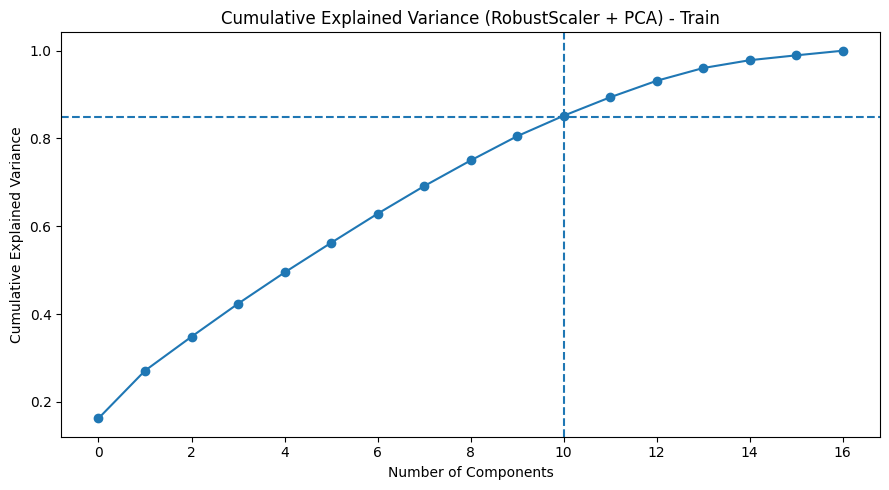

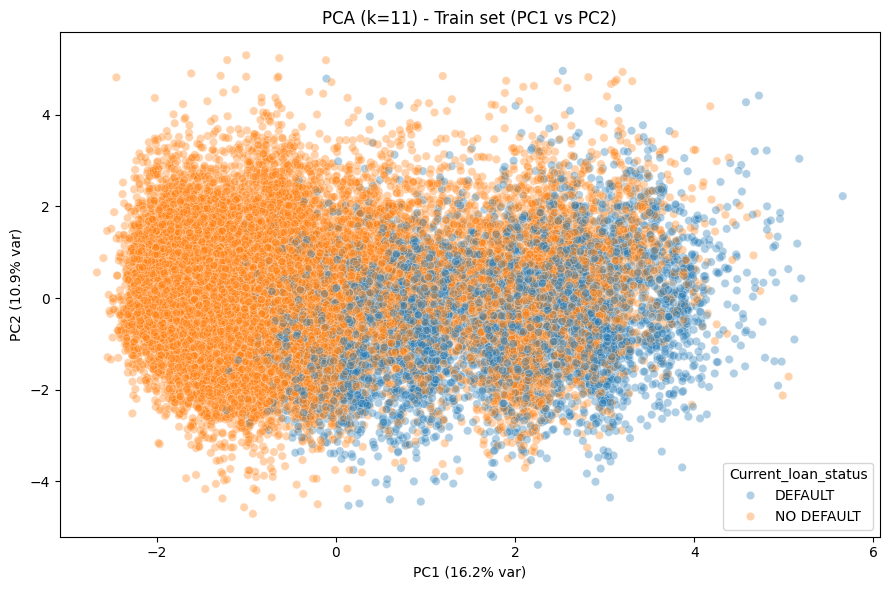


Top loadings for PC1 (abs) - Top 10:
loan_grade_ord               0.515
loan_int_rate                0.488
historical_default_Unknown   0.480
historical_default_Y         0.450
home_ownership_RENT          0.170
credit_hist_ratio            0.106
customer_income              0.081
term_years                   0.069
home_ownership_OWN           0.059
employment_duration          0.057
Name: PC1_loading, dtype: float64

Top loadings for PC2 (abs) - Top 10:
customer_income               0.526
loan_amnt                     0.450
home_ownership_RENT           0.383
employment_duration           0.376
term_years                    0.292
credit_hist_ratio             0.263
loan_intent_HOMEIMPROVEMENT   0.170
loan_grade_ord                0.111
loan_intent_MEDICAL           0.100
loan_intent_EDUCATION         0.100
Name: PC2_loading, dtype: float64

Top loadings for PC3 (abs) - Top 10:
home_ownership_OWN      0.484
loan_intent_VENTURE     0.437
loan_intent_MEDICAL     0.433
home_ownership_REN

In [ ]:

# 1) Scale (fit train)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled  = scaler.transform(X_test_fe)

# 2) Full PCA (fit train) -> k seçmek için
pca_full = PCA(random_state=42)
pca_full.fit(X_train_scaled)

cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# 3) %85 için gereken minimum component sayısı
target = 0.85
k = np.argmax(cum_var >= target) + 1
print(f"%{target*100:.0f} explained variance için gereken min component sayısı: k = {k}")
print("kümülatif explained variance:", round(cum_var[k-1], 4))

# 4) Seçilen k ile PCA'yı tekrar fit et (train) ve transform et
pca_k_std = PCA(n_components=k, random_state=42)
X_train_pca = pca_k_std.fit_transform(X_train_scaled)
X_test_pca  = pca_k_std.transform(X_test_scaled)

# 5) Kümülatif variance grafiği + seçilen k işareti
plt.figure(figsize=(9,5))
plt.plot(cum_var, marker="o")
plt.axhline(target, linestyle="--")
plt.axvline(k-1, linestyle="--")  # index 0'dan başladığı için
plt.title("Cumulative Explained Variance (RobustScaler + PCA) - Train")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.tight_layout()
plt.show()

# 6) PC1-PC2 scatter (train) (görselleştirme aynı mantık)
pca_df = pd.DataFrame(X_train_pca, columns=[f"PC{i}" for i in range(1, k+1)])
pca_df["Current_loan_status"] = y_train.values

plt.figure(figsize=(9,6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Current_loan_status", alpha=0.35)
plt.title(f"PCA (k={k}) - Train set (PC1 vs PC2)")
plt.xlabel(f"PC1 ({pca_k_std.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca_k_std.explained_variance_ratio_[1]*100:.1f}% var)")
plt.tight_layout()
plt.show()

# 7) loadings: sadece seçilen k için
loadings = pd.DataFrame(
    pca_k_std.components_.T,
    index=X_train_fe.columns,
    columns=[f"PC{i}_loading" for i in range(1, k+1)]
)

for i in range(1, min(k, 8)+1):  # çok uzamasın diye ilk 8 PC'yi yazdır
    col = f"PC{i}_loading"
    print(f"\nTop loadings for PC{i} (abs) - Top 10:")
    print(loadings[col].abs().sort_values(ascending=False).head(10))


In [159]:
pca_k_std.explained_variance_ratio_

array([0.16235893, 0.10863872, 0.07741788, 0.07516909, 0.07111762,
       0.06755662, 0.06637469, 0.06281231, 0.05848776, 0.05530503,
       0.04664735])

t-SNE

In [162]:
from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

X_tsne = tsne.fit_transform(X_train_scaled)


In [164]:
tsne_df = pd.DataFrame(
    X_tsne,
    columns=["TSNE1", "TSNE2"]
)

tsne_df["Current_loan_status"] = y_train.values


In [163]:
plt.figure(figsize=(9, 6))

sns.scatterplot(
    data=tsne_df,
    x="TSNE1",
    y="TSNE2",
    hue="Current_loan_status",
    alpha=0.4,
    s=20
)

plt.title("t-SNE Projection (Train Set)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Current_loan_status")
plt.tight_layout()
plt.show()


NameError: name 'tsne_df' is not defined

<Figure size 900x600 with 0 Axes>

t-sne için çoklu

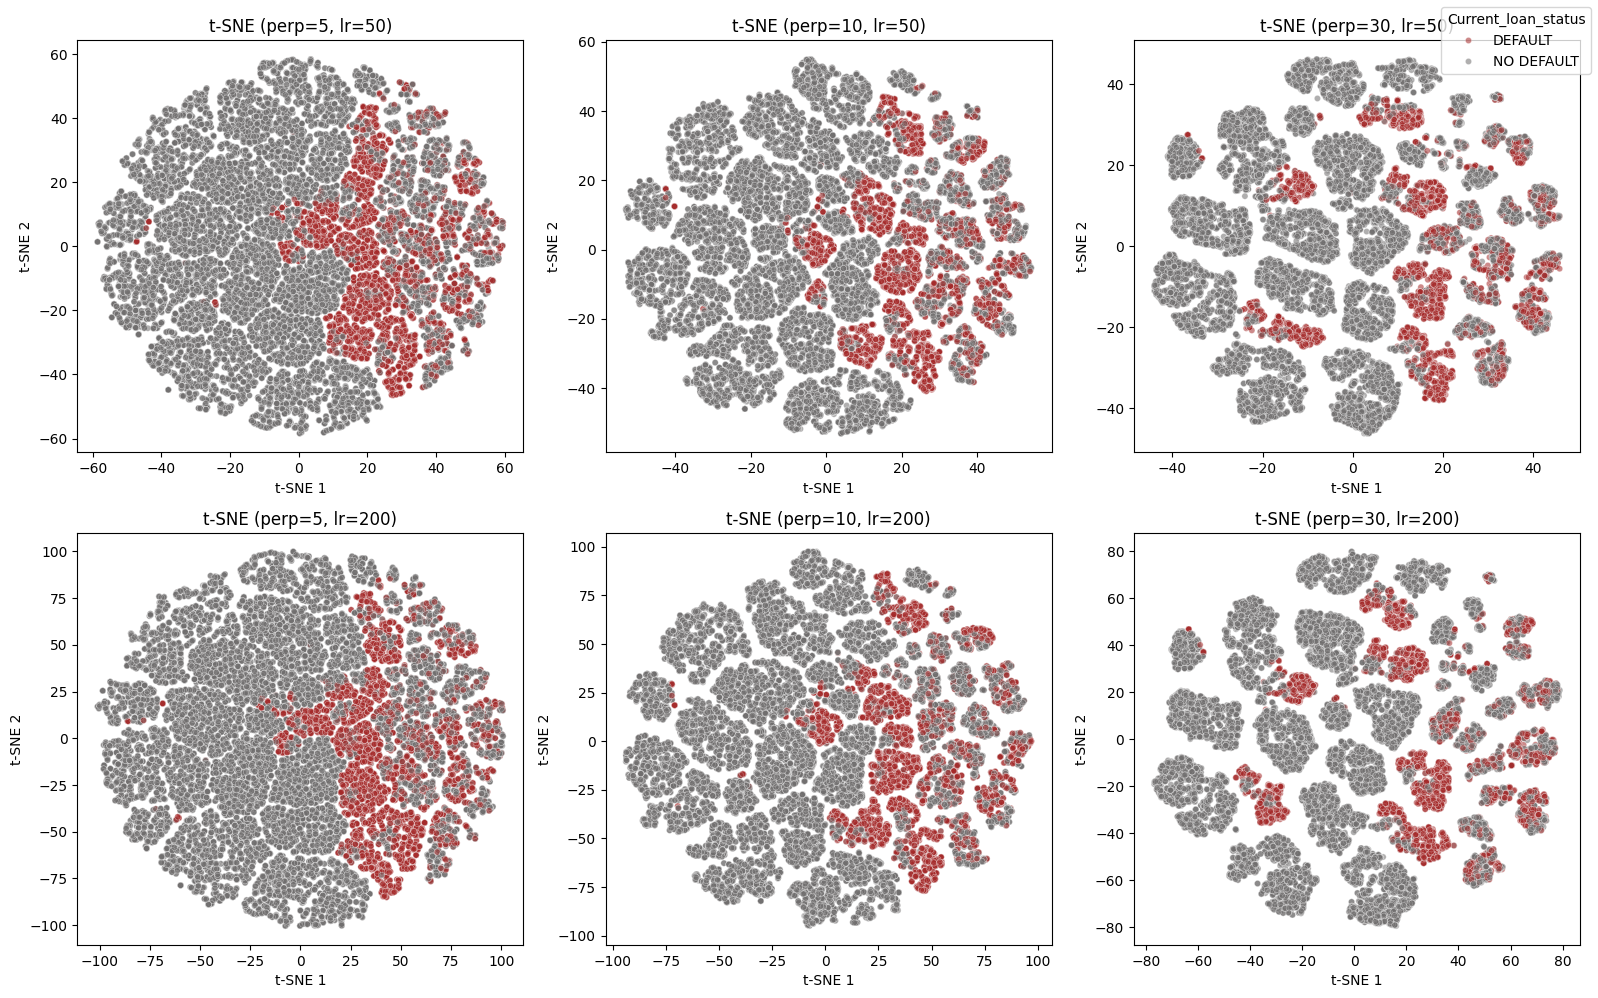

In [165]:
colors = {"NO DEFAULT": "#706e6e", "DEFAULT": "brown"}


scaler2 = StandardScaler()

X_train_scaled_tsne = scaler2.fit_transform(X_train_fe)
X_test_scaled_tsne  = scaler2.transform(X_test_fe)

X_tsne_in = X_train_scaled_tsne.values if hasattr(X_train_scaled_tsne, "values") else X_train_scaled_tsne
y_arr = np.array(y_train)

# 6 kombinasyon = 2x3 grid
tsne_grid = [
    {"perplexity": 5,  "learning_rate": 50},
    {"perplexity": 10, "learning_rate": 50},
    {"perplexity": 30, "learning_rate": 50},
    {"perplexity": 5,  "learning_rate": 200},
    {"perplexity": 10, "learning_rate": 200},
    {"perplexity": 30, "learning_rate": 200},
]

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, params in enumerate(tsne_grid):
    tsne = TSNE(
        n_components=2,
        perplexity=params["perplexity"],
        learning_rate=params["learning_rate"],
        init="pca",
        random_state=42
    )
    emb = tsne.fit_transform(X_tsne_in)

    plot_df = pd.DataFrame(emb, columns=["tSNE1", "tSNE2"])
    plot_df["Current_loan_status"] = y_arr

    sns.scatterplot(
        data=plot_df, x="tSNE1", y="tSNE2",
        hue="Current_loan_status",
        alpha=0.55, s=20, ax=axes[i],
        palette = colors
    )
    axes[i].set_title(f"t-SNE (perp={params['perplexity']}, lr={params['learning_rate']})")
    axes[i].set_xlabel("t-SNE 1")
    axes[i].set_ylabel("t-SNE 2")

    # her subplotta legend istemiyoruz
    if axes[i].legend_ is not None:
        axes[i].legend_.remove()

# tek legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", title="Current_loan_status")

plt.tight_layout()
plt.show()

t-SNE was applied as a non-linear dimensionality reduction technique for visualization purposes, and its sensitivity to hyperparameters was examined by varying perplexity and learning rate values. Lower perplexity values emphasized local neighborhood structures, resulting in smaller and tighter clusters, while higher perplexity values highlighted more global patterns at the cost of local separation. Changes in learning rate mainly affected the spread and stability of the embedding rather than class separation. Across all configurations, default and non-default observations exhibited partial overlap, indicating that t-SNE reveals structural tendencies rather than a clear decision boundary.

MODELLING

In [58]:
# Güvenli mapping
target_map = {
    "DEFAULT": 1,
    "NO DEFAULT": 0
}

# Train
y_train_bin = y_train.map(target_map).astype(int)

# Test
y_test_bin = y_test.map(target_map).astype(int)

# Kontrol
print("Train target distribution:")
print(y_train_bin.value_counts())

print("\nTest target distribution:")
print(y_test_bin.value_counts())


Train target distribution:
Current_loan_status
0    20012
1     5309
Name: count, dtype: int64

Test target distribution:
Current_loan_status
0    5004
1    1327
Name: count, dtype: int64


MODELLEME YAPMADAN ÖNCE -> targeti 0/1'e çevir!!

In [59]:
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, cohen_kappa_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from scipy import stats
from imblearn.pipeline import Pipeline as ImbPipeline


METRIC FONK

In [60]:
def compute_metrics(y_true, y_prob, threshold=0.5):
    y_pred = (y_prob >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) else np.nan
    specificity = tn / (tn + fp) if (tn + fp) else np.nan

    return {
        "AUC": roc_auc_score(y_true, y_prob),
        "F1": f1_score(y_true, y_pred),
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "Kappa": cohen_kappa_score(y_true, y_pred),
    }

def cv_oof_proba(estimator, X, y, cv):
    est = clone(estimator)
    return cross_val_predict(est, X, y, cv=cv, method="predict_proba")[:, 1]

def cv_eval(estimator, X, y, cv, threshold=0.5):
    y_prob = cv_oof_proba(estimator, X, y, cv)
    return compute_metrics(y, y_prob, threshold=threshold)

def fit_eval_test(estimator, Xtr, ytr, Xte, yte, threshold=0.5):
    est = clone(estimator)
    est.fit(Xtr, ytr)
    y_prob = est.predict_proba(Xte)[:, 1]
    return compute_metrics(yte, y_prob, threshold=threshold)


CV ayarı + scaler (one-hot/sparse friendly)

In [61]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scaler = StandardScaler(with_mean=False)
TH = 0.5 

# Hyperparam gridleri
C_grid = np.logspace(-3, 1, 9)             
l1_ratio_grid = [0.2, 0.5, 0.8]
pca_grid = [2, 3, 5, 7, 10, 11]



SCALIN İÇİN;

* Ortalama çıkarılmadı (mean-centering yok)
* Standart sapmaya bölündü (variance scaling var)

Model tanımları

In [62]:
models = {}
searches = {}  # tuned modellerin en iyi paramlarını saklamak için

# A) Baseline Logistic
models["Baseline Logistic (all features)"] = Pipeline(steps=[
    ("scaler", scaler),
    ("logit", LogisticRegression(max_iter=8000, solver="lbfgs"))
])

# B) Balanced (Cost-sensitive)
models["Balanced Logistic (class_weight=balanced)"] = Pipeline(steps=[
    ("scaler", scaler),
    ("logit", LogisticRegression(max_iter=8000, solver="lbfgs", class_weight="balanced"))
])

# C) SMOTE + Logistic (sampling method)
models["SMOTE + Logistic"] = ImbPipeline(steps=[
    ("scaler", scaler),
    ("smote", SMOTE(random_state=42, k_neighbors=5)),
    ("logit", LogisticRegression(max_iter=8000, solver="lbfgs"))
])


# D) PCA + Logistic (MANDATORY) -> CV ile n_components seç
pca_pipe = Pipeline(steps=[
    ("scaler", scaler),
    ("pca", PCA(random_state=42)),
    ("logit", LogisticRegression(max_iter=8000, solver="lbfgs"))
])
pca_search = GridSearchCV(
    pca_pipe,
    param_grid={"pca__n_components": pca_grid},
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)
pca_search.fit(X_train_fe, y_train_bin)
models[f"PCA({pca_search.best_params_['pca__n_components']}) + Logistic"] = pca_search.best_estimator_
searches["PCA + Logistic"] = pca_search.best_params_

# E) Ridge (L2) tuned
ridge_pipe = Pipeline(steps=[
    ("scaler", scaler),
    ("logit", LogisticRegression(penalty="l2", solver="lbfgs", max_iter=10000))
])
ridge_search = GridSearchCV(
    ridge_pipe,
    param_grid={"logit__C": C_grid},
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)
ridge_search.fit(X_train_fe, y_train_bin)
models[f"Ridge (best C={ridge_search.best_params_['logit__C']:.4g})"] = ridge_search.best_estimator_
searches["Ridge"] = ridge_search.best_params_

# F) Lasso (L1) tuned
lasso_pipe = Pipeline(steps=[
    ("scaler", scaler),
    ("logit", LogisticRegression(penalty="l1", solver="saga", max_iter=15000))
])
lasso_search = GridSearchCV(
    lasso_pipe,
    param_grid={"logit__C": C_grid},
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)
lasso_search.fit(X_train_fe, y_train_bin)
models[f"Lasso (best C={lasso_search.best_params_['logit__C']:.4g})"] = lasso_search.best_estimator_
searches["Lasso"] = lasso_search.best_params_

# G) Elastic Net tuned
enet_pipe = Pipeline(steps=[
    ("scaler", scaler),
    ("logit", LogisticRegression(penalty="elasticnet", solver="saga", max_iter=20000))
])
enet_search = GridSearchCV(
    enet_pipe,
    param_grid={"logit__C": C_grid, "logit__l1_ratio": l1_ratio_grid},
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)
enet_search.fit(X_train_fe, y_train_bin)
bp = enet_search.best_params_
models[f"ElasticNet (C={bp['logit__C']:.4g}, l1_ratio={bp['logit__l1_ratio']})"] = enet_search.best_estimator_
searches["ElasticNet"] = enet_search.best_params_

# H) Feature Selection (Embedded): L1 selects -> Plain Logistic on selected
# 1) L1 tuned already exists as best_lasso (above). Use it to select features.
best_l1_for_select = lasso_search.best_estimator_
coefs = best_l1_for_select.named_steps["logit"].coef_.ravel()
selected_features = X_train_fe.columns[(coefs != 0)].tolist()

if len(selected_features) > 0:
    # plain logistic on selected features
    models[f"L1-selected ({len(selected_features)} feats) -> Plain Logistic"] = Pipeline(steps=[
        ("scaler", scaler),
        ("logit", LogisticRegression(max_iter=8000, solver="lbfgs"))
    ])
else:
    print("⚠️ L1 feature selection 0 feature seçti. Bu senaryo atlanacak.")
    selected_features = None


All models were evaluated using 5-fold Stratified Cross-Validation (random_state=42).
Because the target is imbalanced, we report Sensitivity, Specificity, Cohen’s Kappa, ROC-AUC, and F1-score (accuracy alone is not used).
We compared baseline logistic regression, regularized logistic models (Ridge/Lasso/Elastic Net with CV-tuned hyperparameters), imbalance handling (class_weight=balanced and SMOTE within CV), PCA+logistic (mandatory), and an embedded feature selection scenario (L1-selected features refit with plain logistic).

CV + TEST değerlendirme ve tek tablo

In [63]:
rows = []

for name, est in models.items():
    # Feature-selection senaryosunda X'i subset'le
    if name.startswith("L1-selected") and selected_features is not None:
        Xtr = X_train_fe[selected_features]
        Xte = X_test_fe[selected_features]
    else:
        Xtr = X_train_fe
        Xte = X_test_fe

    cv_metrics = cv_eval(est, Xtr, y_train_bin, cv=cv, threshold=TH)
    test_metrics = fit_eval_test(est, Xtr, y_train_bin, Xte, y_test_bin, threshold=TH)

    rows.append({
        "Model": name,
        "CV_AUC": cv_metrics["AUC"],
        "CV_F1": cv_metrics["F1"],
        "CV_Sensitivity": cv_metrics["Sensitivity"],
        "CV_Specificity": cv_metrics["Specificity"],
        "CV_Kappa": cv_metrics["Kappa"],
        "TEST_AUC": test_metrics["AUC"],
        "TEST_F1": test_metrics["F1"],
        "TEST_Sensitivity": test_metrics["Sensitivity"],
        "TEST_Specificity": test_metrics["Specificity"],
        "TEST_Kappa": test_metrics["Kappa"],
    })

results = pd.DataFrame(rows).sort_values("CV_AUC", ascending=False).reset_index(drop=True)

# rapora daha temiz diye yuvarla
results_rounded = results.copy()
metric_cols = [c for c in results.columns if c != "Model"]
results_rounded[metric_cols] = results_rounded[metric_cols].astype(float).round(4)

results_rounded

Model  CV_AUC  CV_F1  CV_Sensitivity  CV_Specificity  CV_Kappa  TEST_AUC  TEST_F1  TEST_Sensitivity  TEST_Specificity  TEST_Kappa
0                          Ridge (best C=10)   0.980  0.845           0.842           0.960     0.804     0.981    0.845             0.849             0.958       0.804
1           Baseline Logistic (all features)   0.980  0.845           0.842           0.960     0.804     0.981    0.846             0.849             0.958       0.805
2   L1-selected (17 feats) -> Plain Logistic   0.980  0.845           0.842           0.960     0.804     0.981    0.846             0.849             0.958       0.805
3                          Lasso (best C=10)   0.980  0.846           0.842           0.960     0.805     0.981    0.845             0.847             0.958       0.803
4            ElasticNet (C=10, l1_ratio=0.8)   0.980  0.845           0.842           0.960     0.804     0.981    0.845             0.847             0.958       0.803
5  Balanced Logistic (class_weight=balanced)   0.980  0.809           0.959           0.891     0.749     0.981    0.806             0.961             0.888       0.744
6                           SMOTE + Logistic   0.980  0.815           0.952           0.898     0.757     0.981    0.809             0.953             0.893       0.748
7                         PCA(11) + Logistic   0.889  0.526           0.467           0.918     0.420     0.884    0.511             0.457             0.911       0.400

In [106]:
models

{'Baseline Logistic (all features)': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                 ('logit', LogisticRegression(max_iter=8000))]),
 'Balanced Logistic (class_weight=balanced)': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                 ('logit',
                  LogisticRegression(class_weight='balanced', max_iter=8000))]),
 'SMOTE + Logistic': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                 ('smote', SMOTE(random_state=42)),
                 ('logit', LogisticRegression(max_iter=8000))]),
 'PCA(11) + Logistic': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                 ('pca', PCA(n_components=11, random_state=42)),
                 ('logit', LogisticRegression(max_iter=8000))]),
 'Ridge (best C=10)': Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                 ('logit',
                  LogisticRegression(C=np.float64(10.0), max_iter=10000))]),
 'Lasso (best C=10)': 

In [107]:
searches

{'PCA + Logistic': {'pca__n_components': 11},
 'Ridge': {'logit__C': np.float64(10.0)},
 'Lasso': {'logit__C': np.float64(10.0)},
 'ElasticNet': {'logit__C': np.float64(10.0), 'logit__l1_ratio': 0.8}}

Variable bazında significance

In [ ]:
import numpy as np
import pandas as pd

from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler

import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError

def _is_fitted_sklearn(est):
    try:
        from sklearn.utils.validation import check_is_fitted
        check_is_fitted(est)
        return True
    except Exception:
        return False

def _transform_X_by_pipeline(fitted_estimator, X_df):
    """
    Pipeline/ImbPipeline içindeki 'scaler' ve opsiyonel 'pca' adımını uygular,
    'logit' adımından önceki X'i döndürür.
    """
    steps = fitted_estimator.named_steps

    X = X_df.copy()
    if "scaler" in steps:
        X = steps["scaler"].transform(X)

    if "pca" in steps:
        X = steps["pca"].transform(X)

    return np.asarray(X)

def _feature_names_after_transform(fitted_estimator, X_columns):
    steps = fitted_estimator.named_steps
    if "pca" in steps:
        pca = steps["pca"]
        k = pca.n_components_
        return [f"PC{i+1}" for i in range(int(k))]
    else:
        return list(X_columns)

def significance_table_for_models(
    models_dict,
    X_train_df,
    y_train_bin,
    alpha=0.05,
    refit_unpenalized=True,
    smote_inference_on_resampled=False,
    skip_smote=True,
):
    """
    Her model için statsmodels ile coef/pvalue tablosu üretir.
    - models_dict: senin `models` dict'in
    - refit_unpenalized: Ridge/Lasso/ENet gibi modellerde inference için cezasız Logit refit
    - skip_smote: True ise SMOTE modelini significance tablosundan çıkarır (önerilir)
    """
    per_model_tables = {}
    summary_rows = []

    for name, est in models_dict.items():
        if ("SMOTE" in name.upper()) and skip_smote:
            summary_rows.append({"Model": name, "Status": "Skipped (SMOTE inference not recommended)"})
            continue

        est2 = clone(est)

        try:
            est2.fit(X_train_df, y_train_bin)
        except Exception as e:
            summary_rows.append({"Model": name, "Status": f"Fit failed: {type(e).__name__}: {e}"})
            continue

        try:
            X_design = _transform_X_by_pipeline(est2, X_train_df)
        except Exception as e:
            summary_rows.append({"Model": name, "Status": f"Transform failed: {type(e).__name__}: {e}"})
            continue

        feat_names = _feature_names_after_transform(est2, X_train_df.columns)

        X_sm = sm.add_constant(X_design, has_constant="add")

        try:
            logit_sm = sm.Logit(y_train_bin, X_sm)
            res = logit_sm.fit(disp=0, maxiter=200)

        except PerfectSeparationError:
            summary_rows.append({"Model": name, "Status": "Perfect separation (Logit failed)"})
            continue
        except Exception as e:
            summary_rows.append({"Model": name, "Status": f"Statsmodels failed: {type(e).__name__}: {e}"})
            continue

        params = res.params
        pvals = res.pvalues
        conf = res.conf_int(alpha=alpha)
        conf.columns = ["CI_low", "CI_high"]

        OR = np.exp(params)
        OR_low = np.exp(conf["CI_low"])
        OR_high = np.exp(conf["CI_high"])

        
        idx = ["Intercept"] + feat_names
        out = pd.DataFrame({
            "coef": params.values,
            "p_value": pvals.values,
            "OR": OR.values,
            "OR_CI_low": OR_low.values,
            "OR_CI_high": OR_high.values,
        }, index=idx)

        out["significant"] = out["p_value"] < alpha

        per_model_tables[name] = out.reset_index(names="term")

        summary_rows.append({
            "Model": name,
            "Status": "OK",
            "n_terms": out.shape[0],
            "n_significant_(alpha)": int(out["significant"].sum())
        })

    summary = pd.DataFrame(summary_rows)
    return summary, per_model_tables

sig_summary, sig_tables = significance_table_for_models(
    models_dict=models,
    X_train_df=X_train_fe,
    y_train_bin=y_train_bin,
    alpha=0.05,
    skip_smote=True  
)

sig_summary


/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/envs/nlp312/lib/python3.12/site-packages/pandas/core/arraylike.py:399:

Model                                     Status  n_terms  n_significant_(alpha)
0           Baseline Logistic (all features)                                         OK   18.000                 15.000
1  Balanced Logistic (class_weight=balanced)                                         OK   18.000                 15.000
2                           SMOTE + Logistic  Skipped (SMOTE inference not recommended)      NaN                    NaN
3                         PCA(11) + Logistic                                         OK   12.000                 11.000
4                          Ridge (best C=10)                                         OK   18.000                 15.000
5                          Lasso (best C=10)                                         OK   18.000                 15.000
6            ElasticNet (C=10, l1_ratio=0.8)                                         OK   18.000                 15.000
7   L1-selected (17 feats) -> Plain Logistic                                         OK   18.000                 15.000

Whole model significance

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.base import clone

def likelihood_ratio_test(models, X, y, alpha=0.05):
    results = []

    null_model = LogisticRegression(
        fit_intercept=True,
        penalty=None,
        solver="lbfgs",
        max_iter=10000
    )
    X_null = np.zeros((len(y), 1))
    null_model.fit(X_null, y)

    p_null = null_model.predict_proba(X_null)[:, 1]
    ll_null = np.sum(y * np.log(p_null) + (1 - y) * np.log(1 - p_null))

    for name, model in models.items():

        if "SMOTE" in name:
            results.append({
                "Model": name,
                "Test": "LRT",
                "LR_stat": np.nan,
                "df": np.nan,
                "p_value": np.nan,
                "Decision (α=0.05)": "Skipped (SMOTE)"
            })
            continue

        est = clone(model)
        est.fit(X, y)

        p = est.predict_proba(X)[:, 1]
        ll_full = np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

        LR = -2 * (ll_null - ll_full)

        if isinstance(est, Pipeline):
            logit = est.named_steps["logit"]
            df = logit.coef_.shape[1]
        else:
            df = est.coef_.shape[1]

        p_val = 1 - chi2.cdf(LR, df)

        results.append({
            "Model": name,
            "Test": "LRT",
            "LR_stat": LR,
            "df": df,
            "p_value": p_val,
            "Decision (α=0.05)": "Reject H₀" if p_val < alpha else "Fail to Reject H₀"
        })

    return pd.DataFrame(results)


In [66]:
lrt_results = likelihood_ratio_test(
    models=models,
    X=X_train_fe,
    y=y_train_bin,
    alpha=0.05
)

lrt_results


Model Test   LR_stat     df  p_value Decision (α=0.05)
0           Baseline Logistic (all features)  LRT 18682.420 17.000    0.000         Reject H₀
1  Balanced Logistic (class_weight=balanced)  LRT 16578.938 17.000    0.000         Reject H₀
2                           SMOTE + Logistic  LRT       NaN    NaN      NaN   Skipped (SMOTE)
3                         PCA(11) + Logistic  LRT  8785.275 11.000    0.000         Reject H₀
4                          Ridge (best C=10)  LRT 18684.673 17.000    0.000         Reject H₀
5                          Lasso (best C=10)  LRT 18685.880 17.000    0.000         Reject H₀
6            ElasticNet (C=10, l1_ratio=0.8)  LRT 18684.874 17.000    0.000         Reject H₀
7   L1-selected (17 feats) -> Plain Logistic  LRT 18682.420 17.000    0.000         Reject H₀

assumptionlar

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

def vif_table(X_df):
    X_ = sm.add_constant(X_df, has_constant="add")
    vifs = []
    for i in range(X_.shape[1]):
        vifs.append(variance_inflation_factor(X_.values, i))
    return pd.DataFrame({"term": X_.columns, "VIF": vifs}).sort_values("VIF", ascending=False)

def box_tidwell_linearity_logit(X_df, y_bin, continuous_cols):
    """
    Box-Tidwell: logit ile doğrusal mı? (yaklaşık test)
    X ve X*log(X) terimi eklenir. X>0 olmalı; gerekirse shift uygula.
    """
    d = X_df.copy()
    eps = 1e-6
    for c in continuous_cols:
        x = d[c].astype(float).copy()
        minx = np.nanmin(x)
        if minx <= 0:
            x = x - minx + 1.0
        d[c] = x
        d[c + "_xlogx"] = x * np.log(x + eps)

    X_sm = sm.add_constant(d, has_constant="add")
    res = sm.Logit(y_bin, X_sm).fit(disp=0, maxiter=200)

    pvals = res.pvalues[[c + "_xlogx" for c in continuous_cols if c + "_xlogx" in res.pvalues.index]]
    return pvals.sort_values()

def influence_diagnostics_logit(X_df, y_bin):
    """
    Influence metrikleri (leverage, Cook's D vs) için statsmodels GLM Binomial kullanıyoruz.
    """
    X_sm = sm.add_constant(X_df, has_constant="add")
    glm = sm.GLM(y_bin, X_sm, family=sm.families.Binomial()).fit()
    infl = glm.get_influence()

    cooks_d = infl.cooks_distance[0]
    hat = infl.hat_matrix_diag

    out = pd.DataFrame({
        "leverage_hat": hat,
        "cooks_d": cooks_d
    }).sort_values("cooks_d", ascending=False)
    return out, glm

vif_df = vif_table(X_train_fe.select_dtypes(exclude="object"))
print(vif_df.head(15))

continuous_cols = [c for c in X_train_fe.columns if c in [
    "customer_age","customer_income","loan_amnt","loan_int_rate","cred_hist_length","employment_duration"
] if c in X_train_fe.columns]

bt_pvals = box_tidwell_linearity_logit(X_train_fe[continuous_cols], y_train_bin, continuous_cols)
print(bt_pvals)  

infl_df, glm_fit = influence_diagnostics_logit(X_train_fe.select_dtypes(exclude="object"), y_train_bin)
print(infl_df.head(20))

                           term     VIF
0                         const 489.015
16               loan_grade_ord   3.312
4                 loan_int_rate   2.915
14   historical_default_Unknown   2.061
15         historical_default_Y   1.887
9         loan_intent_EDUCATION   1.826
11          loan_intent_MEDICAL   1.782
13          loan_intent_VENTURE   1.769
12         loan_intent_PERSONAL   1.733
10  loan_intent_HOMEIMPROVEMENT   1.523
1               customer_income   1.454
8           home_ownership_RENT   1.308
3                     loan_amnt   1.286
17            credit_hist_ratio   1.259
7            home_ownership_OWN   1.158
loan_int_rate_xlogx         0.000
loan_amnt_xlogx             0.000
customer_income_xlogx       0.000
employment_duration_xlogx   0.000
dtype: float64
       leverage_hat  cooks_d
23625         0.006    0.011
10483         0.016    0.010
22169         0.020    0.010
19967         0.026    0.009
5172          0.028    0.009
18084         0.042    0.007
4384  

* Veri setinde modele aşırı etki eden (influential) veya tahminleri bozabilecek gözlemler bulunmamaktadır.
* Assumptions of logistic regression were evaluated prior to model interpretation. Linearity in the logit for continuous predictors was assessed using the Box–Tidwell procedure. While minor deviations were observed for certain variables, the overall model fit and predictive performance remained strong. Influence diagnostics based on leverage and Cook’s distance indicated no overly influential observations. Furthermore, likelihood ratio tests confirmed that all fitted models provided a statistically significant improvement over the null model (p < 0.001).

“Among all fitted models, the Ridge logistic regression was selected as the final model due to its strong predictive performance, statistical significance based on the likelihood ratio test, robustness to mild assumption violations, and better coefficient stability compared to unregularized and sparsity-inducing alternatives.”

In [ ]:
from sklearn.metrics import roc_auc_score
import pandas as pd

auc_scores = {}
y_test_probas = {}

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test_fe)[:, 1]
        auc = roc_auc_score(y_test_bin, y_proba)
        auc_scores[name] = auc
        y_test_probas[name] = y_proba
    else:
        print(f"❌ {name} modeli predict_proba desteklemiyor.")

auc_df = pd.DataFrame.from_dict(auc_scores, orient="index", columns=["Test AUC"])
auc_df = auc_df.sort_values(by="Test AUC", ascending=False)
display(auc_df)

best_model_name = auc_df.index[0]
print(f"✅ En iyi model: {best_model_name} (AUC: {auc_df.iloc[0, 0]:.4f})")


Test AUC
Baseline Logistic (all features)              0.981
L1-selected (17 feats) -> Plain Logistic      0.981
Lasso (best C=10)                             0.981
ElasticNet (C=10, l1_ratio=0.8)               0.981
Ridge (best C=10)                             0.981
SMOTE + Logistic                              0.981
Balanced Logistic (class_weight=balanced)     0.981
PCA(11) + Logistic                            0.884

✅ En iyi model: Baseline Logistic (all features) (AUC: 0.9813)


In [ ]:
import numpy as np

best_model = models["Ridge (best C=10)"]

coefs = best_model.named_steps["logit"].coef_.ravel()
features = X_train_fe.columns if "smote" not in best_model_name.lower() else X_train_fe.columns  # smote'da da aynı
coef_df = pd.DataFrame({"Feature": features, "Coef": coefs})

print("📈 Temerrüt riskini en çok artıran değişkenler:")
display(coef_df[coef_df["Coef"] > 0])


print("📉 Temerrüt riskini en çok azaltan değişkenler:")
display(coef_df[coef_df["Coef"] < 0])


📈 Temerrüt riskini en çok artıran değişkenler:


Feature  Coef
2              loan_amnt 0.489
3          loan_int_rate 0.067
4             term_years 0.081
5   home_ownership_OTHER 0.027
7    home_ownership_RENT 0.342
15        loan_grade_ord 1.039

📉 Temerrüt riskini en çok azaltan değişkenler:


Feature    Coef
0               customer_income  -0.912
1           employment_duration  -0.123
6            home_ownership_OWN  -0.471
8         loan_intent_EDUCATION  -0.518
9   loan_intent_HOMEIMPROVEMENT  -0.206
10          loan_intent_MEDICAL  -0.247
11         loan_intent_PERSONAL  -0.463
12          loan_intent_VENTURE  -0.555
13   historical_default_Unknown -21.343
14         historical_default_Y  -1.377
16            credit_hist_ratio  -0.889

In [ ]:
for name, model in models.items():
    try:
        check_is_fitted(model)
    except NotFittedError:
        print(f"Fitting: {name}")
        model.fit(X_train_fe if "selected" not in name else X_train_fe[selected_features], y_train_bin)


Fitting: Baseline Logistic (all features)
Fitting: Balanced Logistic (class_weight=balanced)
Fitting: SMOTE + Logistic
Fitting: L1-selected (17 feats) -> Plain Logistic


In [83]:
X_train_fe.head()

customer_income  employment_duration  loan_amnt  loan_int_rate  term_years  home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  loan_intent_VENTURE  historical_default_Unknown  historical_default_Y  loan_grade_ord  credit_hist_ratio
10864           11.067                8.000      8.517          7.880           4                     0                   0                    0                      1                            0                    0                     0                    0                           0                     0               1              0.167
13995           11.082                3.000      9.547         10.650           3                     0                   0                    1                      0                            0                    0                     1                    0                           1                     0               1              0.174
10321           11.109                3.530      9.105          6.990           4                     0                   0                    0                      0                            1                    0                     0                    0                           1                     0               1              0.083
15729           11.427                7.000      9.645         10.910           6                     0                   0                    1                      0                            0                    1                     0                    0                           0                     1               2              0.115
12755           11.350                7.000      8.613         13.490           5                     0                   0                    0                      0                            0                    0                     1                    0                           1                     0               2              0.120